# Modélisation, abstraction



# Poids des modes de consommation énergétiques cf. les types d'usages

In [13]:
from pepper_commons import *

✔ _data loaded
✔ struct loaded


In [14]:
from seattle_commons import clean_dataset
data = get_data()
_data, not_compliant, outliers = clean_dataset(data)

In [15]:
cols = [
    'PropertyGFATotal',
    'SiteEnergyUse(kBtu)',
    'Electricity(kBtu)',
    'SteamUse(kBtu)',
    'NaturalGas(kBtu)', # ix computed
    'LargestPropertyUseType',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFA',
    'ListOfAllPropertyUseTypes'
]

a = _data[cols]
a.columns = ['s', 'e', 'e1', 'e2', 'e3', 's1_label', 's1', 's2_label', 's2', 's3_label', 's3', 'sx_labels']
#display(a)

b = a[['s', 'e']].copy()
b['i1'] = round(a.e1 / a.e, 3)
b['i2'] = round(a.e2 / a.e, 3)
b['i3'] = round(a.e3 / a.e, 3)
b['ix'] = 1 - (b.i1 + b.i2 + b.i3)
display(b)

# pour faire la suite, je dois basculer de chantier et revenir :
# il faut autant de colonnes que de catégories d'usage, en les classant en ordre décroissant de surface totale
# c'est donc un retour sur l'analyses des catégories détaillées d'usages

#eu = _data[['PropertyGFAParking', 'PropertyGFABuilding(s)', ]].copy()

# s, e, i1, i2, i3, ix, u1, u2, u3, ux, ux_labels

# area.columns = ['x', 'y', 'z']
# area['x + y'] = area.x + area.y
# relevant, aber = exclude_irrelevants(area, ['z', 'x + y'])
# check, inconst = assert_const_ratio(relevant, 'z', 'x + y')

,s,e,i1,i2,i3,ix
id,,,,,,
1,88434,7.226362e+06,0.546,0.277,0.177,0.000
2,103566,8.387933e+06,0.387,0.000,0.613,0.000
3,956110,7.258702e+07,0.682,0.297,0.021,0.000
5,61320,6.794584e+06,0.408,0.326,0.267,-0.001
8,175580,1.417261e+07,0.379,0.000,0.621,0.000
...,...,...,...,...,...,...
50221,18261,9.320821e+05,0.678,0.000,0.322,0.000
50223,16000,9.502762e+05,0.417,0.000,0.583,0.000
50224,13157,5.765898e+06,0.311,0.000,0.689,0.000


# Clean Dataset

Ici j'entreprends de bâtir un premier dataset propre pour faire tourner mes premiers modèles.

In [16]:
from use_types_analysis import unique_uses_table
unique_uses = unique_uses_table(_data)
display(unique_uses)

,freq,area,%f,%a
Multifamily Housing,1665,9.725056e+07,0.287863,0.316416
Office,847,6.461354e+07,0.146438,0.210228
Parking,1072,3.807907e+07,0.185339,0.123895
College/University,27,1.463456e+07,0.004668,0.047615
Non-Refrigerated Warehouse,256,1.208134e+07,0.044260,0.039308
...,...,...,...,...
Swimming Pool,47,0.000000e+00,0.008126,0.000000
Outpatient Rehabilitation/Physical Therapy,2,0.000000e+00,0.000346,0.000000
Single Family Home,1,0.000000e+00,0.000173,0.000000
Energy/Power Station,1,0.000000e+00,0.000173,0.000000


In [17]:
unique_uses = unique_uses.reset_index()
display(unique_uses)

,index,freq,area,%f,%a
0,Multifamily Housing,1665,9.725056e+07,0.287863,0.316416
1,Office,847,6.461354e+07,0.146438,0.210228
2,Parking,1072,3.807907e+07,0.185339,0.123895
3,College/University,27,1.463456e+07,0.004668,0.047615
4,Non-Refrigerated Warehouse,256,1.208134e+07,0.044260,0.039308
...,...,...,...,...,...
62,Swimming Pool,47,0.000000e+00,0.008126,0.000000
63,Outpatient Rehabilitation/Physical Therapy,2,0.000000e+00,0.000346,0.000000
64,Single Family Home,1,0.000000e+00,0.000173,0.000000
65,Energy/Power Station,1,0.000000e+00,0.000173,0.000000


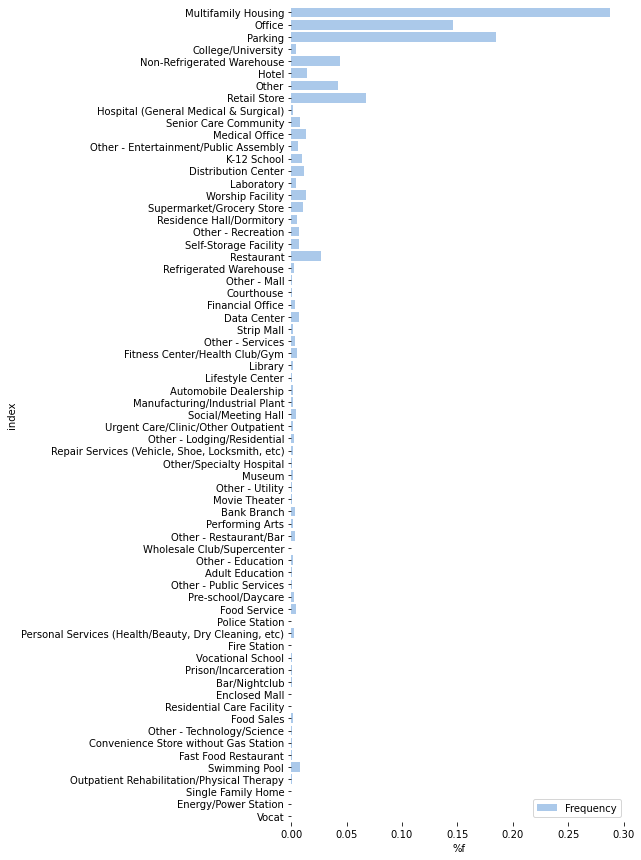

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes('pastel')
sns.barplot(x=r'%f', y='index', data=unique_uses,
            label='Frequency', color='b')

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",
#       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
plt.show()

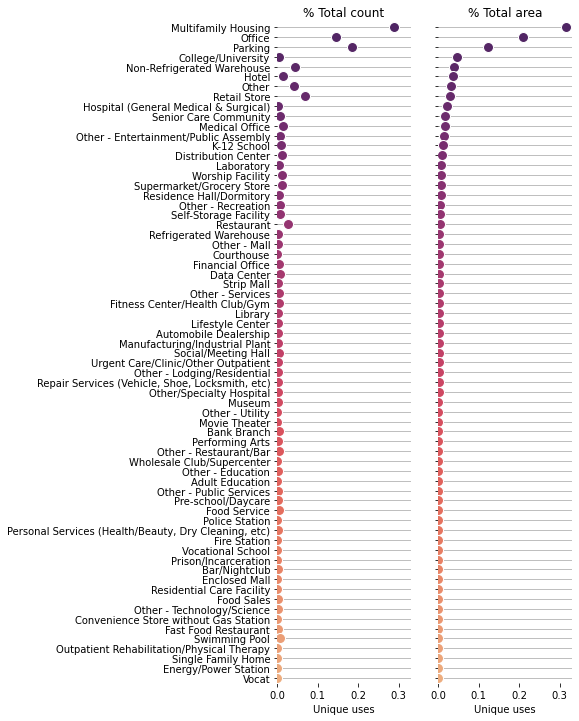

In [19]:
# Adaptation directe de : https://seaborn.pydata.org/examples/pairgrid_dotplot.html
# TODO : observer le graphique m'interpelle immédiatement sur la nécessité de compléter
# avec l'énergie et l'émission de gaz à effet de serre
# Je ne suis pas certain que ce soit le meilleur choix graphique.
# Utiliser un hue pour mettre les barres côte à côte serait + efficace cf. ce que j'ai fait dans monovar

import seaborn as sns
#sns.set_theme(style="whitegrid")

# Load the dataset
#crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(unique_uses, #crashes.sort_values("total", ascending=False),
                 x_vars=unique_uses.columns[-2:], y_vars=['index'],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient='h', jitter=False,
      palette='flare_r', linewidth=1, edgecolor='w')

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, .33), xlabel='Unique uses', ylabel='') # xlim=(0, 25), 

# Use semantically meaningful titles for the columns
titles = ['% Total count', '% Total area'] #, "Alcohol crashes",
          #"Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [20]:
from use_types_analysis import use_table
u_table = use_table(_data)
totals = u_table.sum()
display(u_table / totals)

,Unknown,Multifamily Housing,Office,Parking,College/University,Non-Refrigerated Warehouse,Hotel,Other,Retail Store,Hospital (General Medical & Surgical),...,Food Sales,Other - Technology/Science,Convenience Store without Gas Station,Fast Food Restaurant,Swimming Pool,Outpatient Rehabilitation/Physical Therapy,Single Family Home,Energy/Power Station,Vocat,nan
id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.007957,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
2,0.000000,0.0,0.000000,0.000396,0.0,0.0,0.007547,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
3,0.289253,0.0,0.000000,0.000000,0.0,0.0,0.068065,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
5,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.005517,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
8,-0.023002,0.0,0.000000,0.001788,0.0,0.0,0.011107,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
50223,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
50224,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN


### Encodage des catégories

In [21]:
# déplacée dans use_types_analysis + fonctions get_btype_id et get_ptype_id dans seattle_commons

# encodage des catégories
def unique_table(data, label):
    g = data[[label, 'PropertyGFATotal']]
    gb = g.groupby(by=label).agg(['count', 'sum'])
    gb.columns = ['freq', 'area']
    totals = gb.sum()
    gb[r'%f'] = gb.freq / totals.freq
    gb[r'%a'] = gb.area / totals.area
    gb = gb.sort_values(by='area', ascending=False)
    return gb

u = unique_table(_data, 'PrimaryPropertyType')
display(u)

bt = _data.PrimaryPropertyType
display(bt)

bt = _data.PrimaryPropertyType.map(lambda x: u.index.get_loc(x))
display(bt)


,freq,area,%f,%a
PrimaryPropertyType,,,,
Large Office,169,61685616,0.052632,0.200541
Mid-Rise Multifamily,553,50355886,0.172220,0.163708
Low-Rise Multifamily,956,41111601,0.297727,0.133655
Other,250,24477410,0.077857,0.079577
High-Rise Multifamily,103,21521758,0.032077,0.069968
University,25,15053475,0.007786,0.048939
Mixed Use Property,132,14135081,0.041109,0.045954
Small- and Mid-Sized Office,287,13427354,0.089380,0.043653
Hotel,76,12419512,0.023669,0.040376


id
1                     Hotel
2                     Hotel
3                     Hotel
5                     Hotel
8                     Hotel
                ...        
50221                 Other
50223                 Other
50224                 Other
50225    Mixed Use Property
50226    Mixed Use Property
Name: PrimaryPropertyType, Length: 3211, dtype: object

id
1        8
2        8
3        8
5        8
8        8
        ..
50221    3
50223    3
50224    3
50225    6
50226    6
Name: PrimaryPropertyType, Length: 3211, dtype: int64

In [22]:
y = _data['SiteEUI(kBtu/sf)']
display(y)
display(y.astype(int))

id
1         81.699997
2         94.800003
3         96.000000
5        110.800003
8        114.800003
            ...    
50221     51.000000
50223     59.400002
50224    438.200012
50225     51.000000
50226     63.099998
Name: SiteEUI(kBtu/sf), Length: 3211, dtype: float64

id
1         81
2         94
3         96
5        110
8        114
        ... 
50221     51
50223     59
50224    438
50225     51
50226     63
Name: SiteEUI(kBtu/sf), Length: 3211, dtype: int32

In [23]:
from use_types_analysis import use_table

# l'intensité de la consommation énergétique : c'est la target !!!
y = _data['SiteEUI(kBtu/sf)']
y_discr = y.astype(int)

# sur le premier jeu, on fait abstraction de la masse et de la structure du bâtiment

# retraits de base : outliers, non conformes (mais je conserve les multi family pour le moment)

#display(_data)

# mes outliers non corrigés
# là c'est un travail fin, qui reste à poursuivre, mais en prochaine itération (incréments)
# dans un premier temps, on élimine : ça demande immédiatement de réduire à une seule ligne
# ce qui est fait en bivarié => fait, mais bcp d'outliers s'expliquent

# encodage des catégories : il faut que j'étudie cela de plus près

# je conserve les colonnes suivantes (features) :

# type de bâtiment :
#types = _data[['BuildingType', 'PrimaryPropertyType']]

u_bt = unique_table(_data, 'BuildingType')
bt = _data.BuildingType.map(lambda x: u_bt.index.get_loc(x))

u_ppt = unique_table(_data, 'PrimaryPropertyType')
ppt = _data.PrimaryPropertyType.map(lambda x: u_ppt.index.get_loc(x))

# dimensions : # bâtiments et # étages et surface du bâtiment ==> on laisse de côté pour démarrer

# type d'usage : codage pour démarrer : suivant les surfaces totales décroissantes
# parts relatives de la surface (suivant les usages) [erreurs corrigées ou outliers virés] :
#    totale ext, totale int
#    ventilée cf. les 69 + 1 types d'usages (+1 unknown)
# TODO : là, je suis coincé tant que je n'ai pas corrigé les surfaces erronées
u_table = use_table(_data)
u_table = u_table / u_table.sum()

# parts relatives dans le mix énergétique (cf. énergie totale consommée), dont les erreurs sont corrigées :
#    ventilée cf. les 3 + 1 types d'énergies (+ 1 unknown)
e_table = _data[['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']]
e_table = e_table / e_table.sum()

# intensité d'émission de GES
g = _data.GHGEmissionsIntensity

X = pd.concat([bt, ppt, u_table, e_table, g], axis=1)

X = X.fillna(0)  # pour les 4 cas bien identifiés 23355, 25431, 25763, 50082
display(X)


,BuildingType,PrimaryPropertyType,Unknown,Multifamily Housing,Office,Parking,College/University,Non-Refrigerated Warehouse,Hotel,Other,...,Swimming Pool,Outpatient Rehabilitation/Physical Therapy,Single Family Home,Energy/Power Station,Vocat,nan,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
1,0,8,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.007957,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.002190,0.000324,0.000287,2.83
2,0,8,0.000000,0.0,0.000000,0.000396,0.0,0.0,0.007547,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.000266,0.001156,2.86
3,0,8,0.289253,0.0,0.000000,0.000000,0.0,0.0,0.068065,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.023566,0.004063,0.000336,2.19
5,0,8,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.005517,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.002420,0.000227,0.000407,4.67
8,0,8,-0.023002,0.0,0.000000,0.001788,0.0,0.0,0.011107,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.000440,0.001979,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,5,3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.000052,0.000067,1.11
50223,5,3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.000033,0.000124,2.01
50224,5,3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.000147,0.000893,16.99


In [24]:
# où sont les NaN ?~
subset = None
is_aberrant = lambda s: s.isna()
d = X[X.columns if subset is None else subset].copy()
is_ab = d.apply(is_aberrant).any(axis=1)
ab = X[is_ab]
re = X[~is_ab]
display(ab)

,BuildingType,PrimaryPropertyType,Unknown,Multifamily Housing,Office,Parking,College/University,Non-Refrigerated Warehouse,Hotel,Other,...,Swimming Pool,Outpatient Rehabilitation/Physical Therapy,Single Family Home,Energy/Power Station,Vocat,nan,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,


# Reprise du cours, application directe ici

A la fin, avec du kNN, j'obiens 3 %.. pas fameux ce premier essai.

Mais l'important, c'est de l'avoir fait.

In [25]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_discr, test_size=.3) # 30 % pour test

c:\Users\franc\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


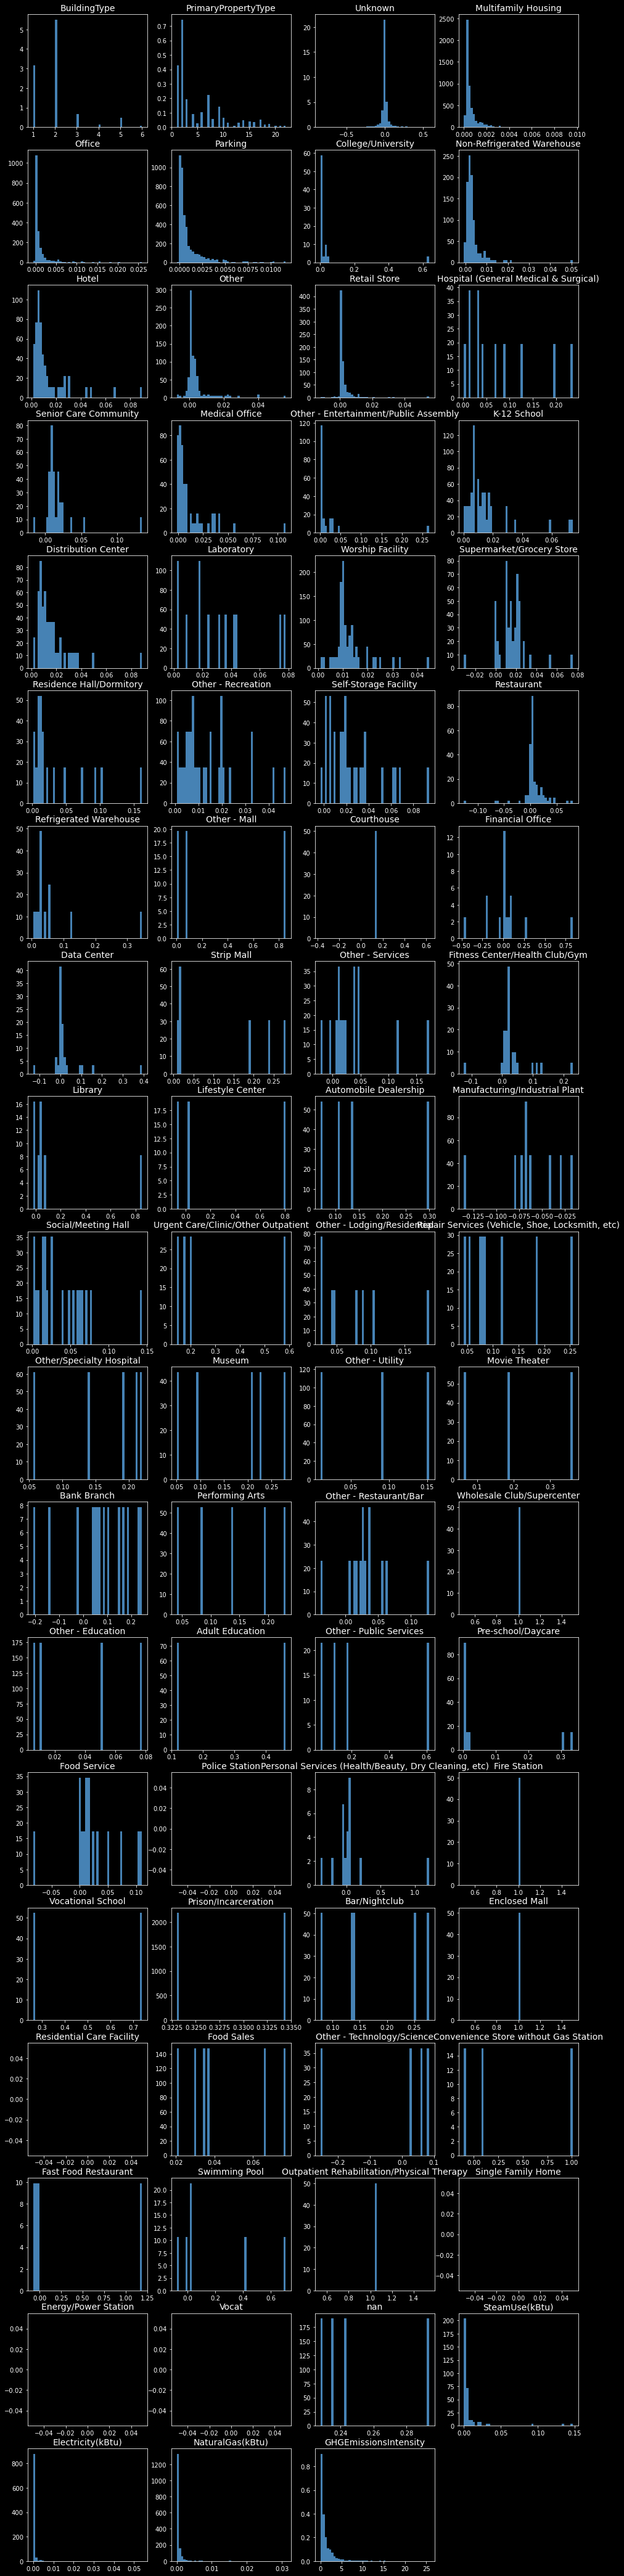

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('dark_background')
#np.seterr(invalid='ignore')
def histos(X, labels):
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    n_rows = 1 + (X.shape[1] // 4)
    f = plt.figure(figsize=(16, 4 * n_rows))
    for cid in range(X.shape[1]):#id, label in enumerate(X.columns):
        x = X[:, cid]
        x = x[x != 0]
        ax = f.add_subplot(n_rows, 4, cid + 1)
        h = ax.hist(x, bins=50, color='steelblue', density=True, edgecolor=None)
        ax.set_title(labels[cid], fontsize=14)

histos(X_train, X.columns)

In [27]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

c:\Users\franc\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


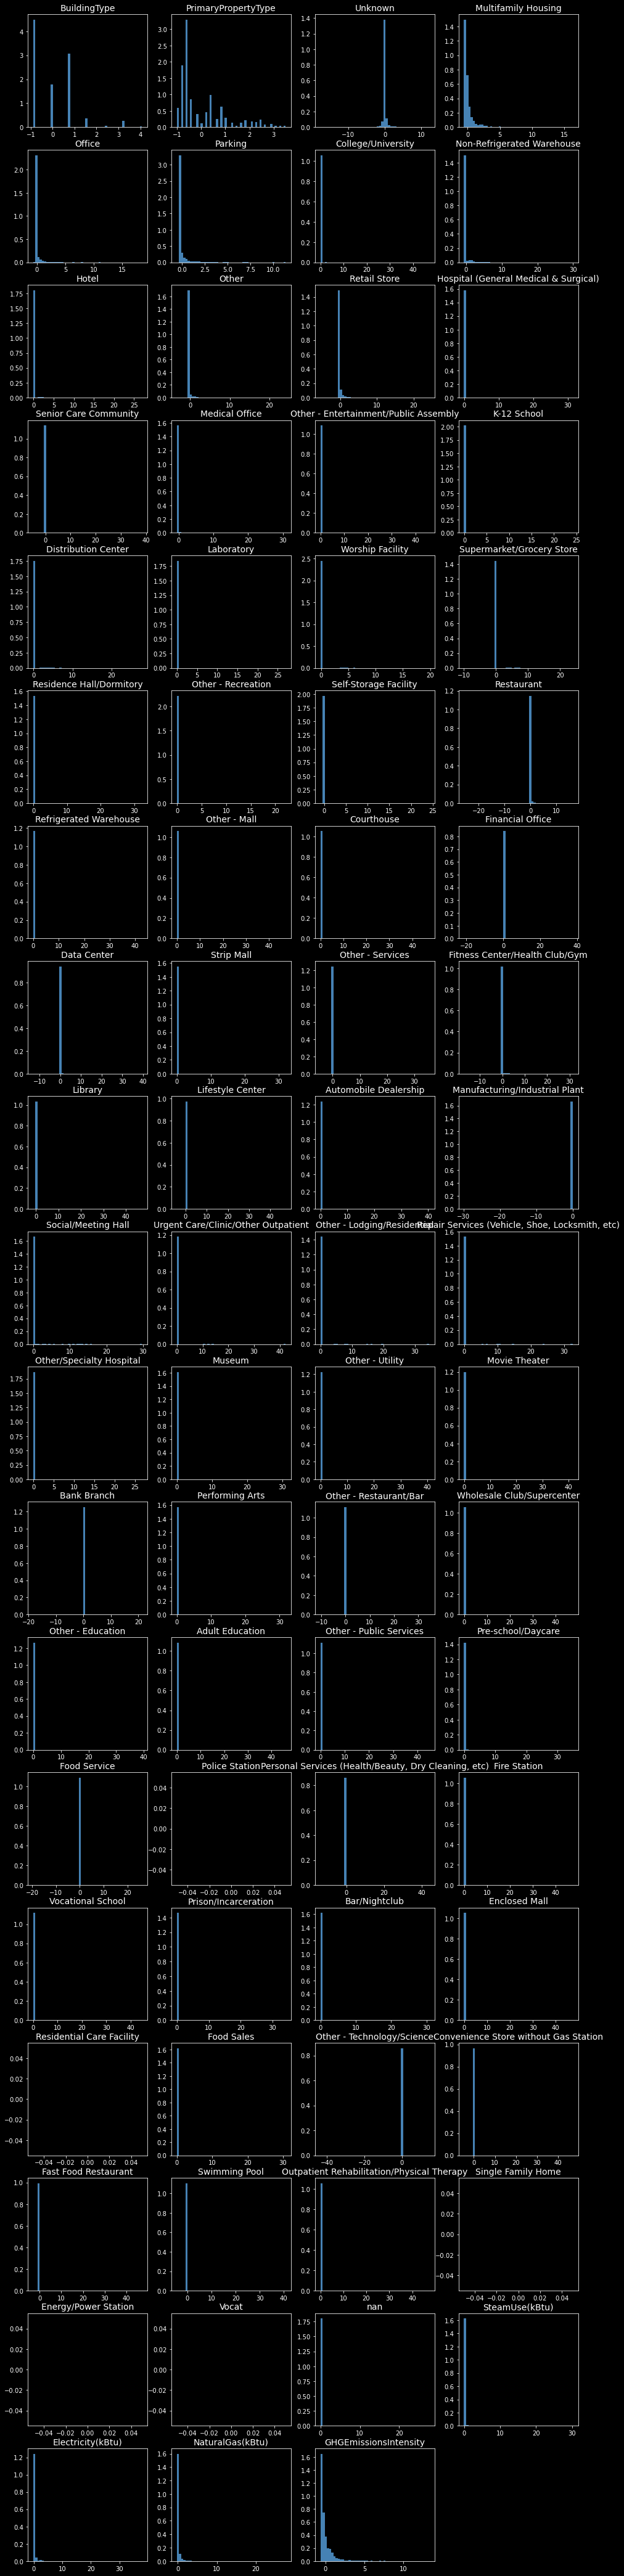

In [28]:
histos(X_train_std, X.columns)

In [29]:
from sklearn import neighbors, metrics

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}   # paramètres testés
score = 'accuracy'    # le score que l'on cherche à optimiser : ici la proportion de prédictions ok

# classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(),  # un classifieur kNN
    param_grid,                        # hyperparamètres à tester
    cv=5,                              # nombre de folds de validation croisée
    scoring=score                      # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print('Meilleur(s) hyperparamètre(s) sur le jeu d\'entraînement:')
print(clf.best_params_)

# Afficher les performances correspondantes
print('Résultats de la validation croisée :')
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'],  # score moyen
        clf.cv_results_['std_test_score'],   # écart-type du score
        clf.cv_results_['params']            # valeur de l'hyperparamètre
    ):
    print(f'{score} = {mean:.3f} (+/-{std * 2:.03f}) for {params}')

c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 1}
Résultats de la validation croisée :
accuracy = 0.045 (+/-0.010) for {'n_neighbors': 1}
accuracy = 0.041 (+/-0.017) for {'n_neighbors': 2}
accuracy = 0.036 (+/-0.010) for {'n_neighbors': 3}
accuracy = 0.028 (+/-0.013) for {'n_neighbors': 4}
accuracy = 0.033 (+/-0.017) for {'n_neighbors': 5}
accuracy = 0.032 (+/-0.012) for {'n_neighbors': 6}
accuracy = 0.034 (+/-0.010) for {'n_neighbors': 7}
accuracy = 0.038 (+/-0.015) for {'n_neighbors': 8}
accuracy = 0.040 (+/-0.017) for {'n_neighbors': 9}
accuracy = 0.039 (+/-0.018) for {'n_neighbors': 10}
accuracy = 0.036 (+/-0.014) for {'n_neighbors': 11}
accuracy = 0.035 (+/-0.013) for {'n_neighbors': 12}
accuracy = 0.032 (+/-0.011) for {'n_neighbors': 13}
accuracy = 0.031 (+/-0.010) for {'n_neighbors': 14}
accuracy = 0.031 (+/-0.013) for {'n_neighbors': 15}


# 21/09 Réattaque sur des parties

J'ai enfin suivi le cours sur l'évaluation des performances de modèles jusqu'au bout (me reste le TP final).

Sur cette base, je comprends mieux les termes que j'ai vu employés sur Discord hier soir.

Dans cette réattaque, je me propose le plan suivant, ciblé :
* ✔ repartir de num_bivar_analysis et cibler les cas tordus ou la linéarité n'est pas respectée.
* produire (fonctions toutes faites prêtes à l'emploi) les sous-tables de données, avec exclusion de ce qui doit l'être, correction (basique) de ce qui doit l'être. Les deux predict, naïf, manuel humain et IA peuvent ainsi être mis en concurrence pour montrer leurs performances respectives.
* faire ma fonction predict et une predict de sklearn (en tester plein de différentes). Ma fonction sera considérée comme l'une des naïves de référence (mais je vais faire les autres du cours pour jouer le jeu).
* l'objectif est d'utiliser le ML déjà au stade du feature engineering, pour réparer les données incorrectes / pour identifier les outliers.

Retour 2j en arrière.

## EUI Source / Site


`'SourceEUI(kBtu/sf)'` l'**intensité de la consommation d'énergie** (EUI) est la consommation d'énergie source d'une propriété divisée par sa surface de plancher brute. La consommation d'énergie source est l'énergie annuelle utilisée pour exploiter la propriété, y compris les pertes de production, de transmission et de distribution. L'EUI source est mesurée dans des milliers d'unités thermiques britanniques (KBTU) par pied carré.

`'SiteEUI(kBtu/sf)'` l'**intensité de la consommation d'énergie du site** (EUI) est la consommation d'énergie du site d'une propriété divisée par sa surface de plancher brute. La consommation d'énergie du site est le montant annuel de toute l'énergie consommée par la propriété sur place, comme indiqué sur les factures de services publics. Le site EUI est mesuré en milliers d'unités thermiques britanniques (KBTU) par pied carré.

Etude du rapport entre :
* `'SourceEUI(kBtu/sf)'`
* `'SiteEUI(kBtu/sf)'`

Bilan :
* Rapport non constant :
    - un pic (mode) sur un rapport maximum (sauf outliers) $E_{Source} = 3.142857 E_{Site}$
    - des rapports qui se distribuent ensuite entre 1.25 et ce maximum
    - nb > un ratio < 1 serait aberrant, mais aucun cas de ce type n'est présent dans le jeu de données.
* Exclusion de 4 <mark> Qui, pourquoi ?</mark>.
* Outliers hors l'intervalle 1.25, 3.142857 :
    - 6 individus aberrants dont la valeur source est nulle [505, 513, 755, 1323, 1883, 2791]
    - 1 low outlier avec un rapport à peine supérieur à 1 (1.05) [426] (Proche de la centrale ?)
    - 2 low outliers dont les rapports sont 0.28 et 0.41, ce qui est a priori impossible [3206, 2761]
    - 3 high outliers dont les rapports sont 4.66, 5.16 et 13.72 [46, 3350, 529]

Théorie : le rapport exprime le coût réel de production de l'énergie consommée, en prenant en compte les pertes de l'opérateur sur son réseau de distribution. On peut pousser l'hypothèse - qui pourrait être vérifiée - à une déperdition qui dépend de la distance à la centrale de production. Cependant, cette dernière hypothèse est molle face à un maximum constant où se concentre la plus grande partie des individus.


Théorie 2 : ce sont simplement des erreurs de troncature sur le calcul amont des ratios d'intensité (conso / surface).

Mon sentiment c'est qu'il y a un truc, un verrou, une erreur numérique qq part qui s'est propagée. Si je la trouve, je déverrouille, car je comprends et je peux rectifier. Le pb, c'est qu'il y a actuellement des erreurs constatées à plusieurs niveaux (surfaces, énergies).

Indices :
* les sites EUI n'ont qu'un chiffre significatif et des erreurs de troncature sur le reste de la mantisse.
* ... bon, ce 21/09 au soir, je reste perplexe.. j'espère avancer davantage côté surfaces

In [30]:
# retour d'abord sur les outliers
# un truc pas fait, c'est déduire les deux valeurs de surface de source et site intensité
# et de la comparer à la surface enregistrée
#display(_data)
d = _data[['BuildingType', 'PrimaryPropertyType', 'PropertyGFATotal',
'SiteEnergyUse(kBtu)', 'SiteEnergyUse(kBtu)', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)']].copy()
d.columns = ['b_type', 'p_type', 's', 'site_eu', 'site_eui_calc', 'site_eui', 'source_eui']
x = d.site_eui
y = d.source_eui
r = d['ratio'] = y / x
d.site_eui_calc = d.site_eu / d.s
print_subtitle('SourceEUI data is null')
display(d[y == 0])
"""
ID Village Square 2
IUC- Whole Foods Interbay
Union Bay Apartments
Minor Tower Apartments
BRIDGE PARK HOLIDAY RETIREMENT
New Central
"""
print_subtitle('Low outliers : SourceEUI/SiteEUI < 1')
display(d[(y > 0) & (r < 1)]) # ca fait 10 et pas 3

print_subtitle('High outliers : SourceEUI/SiteEUI > 3.62')
display(d[(r > 3.62)]) # ca fait 10 et pas 3


SourceEUI data is null


,b_type,p_type,s,site_eu,site_eui_calc,site_eui,source_eui,ratio
id,,,,,,,,
688,Multifamily MR (5-9),Mid-Rise Multifamily,228288,5974993.5,26.173051,55.599998,0.0,0.0
700,NonResidential,Supermarket / Grocery Store,57176,12525174.0,219.063488,208.800003,0.0,0.0
19793,Multifamily MR (5-9),Mid-Rise Multifamily,86525,2321336.0,26.828500,37.000000,0.0,0.0
21524,Multifamily LR (1-4),Low-Rise Multifamily,37361,880115.5,23.557065,31.700001,0.0,0.0
23682,Multifamily LR (1-4),Senior Care Community,144682,5121586.0,35.398916,35.400002,0.0,0.0
26973,NonResidential,Mixed Use Property,49299,4729846.5,95.942037,89.199997,0.0,0.0



Low outliers : SourceEUI/SiteEUI < 1


,b_type,p_type,s,site_eu,site_eui_calc,site_eui,source_eui,ratio
id,,,,,,,,
26849,NonResidential,Retail Store,24550,977230.3125,39.805715,39.799999,16.4,0.41206
49784,NonResidential,Small- and Mid-Sized Office,52000,342726.0938,6.590886,7.100000,2.0,0.28169



High outliers : SourceEUI/SiteEUI > 3.62


,b_type,p_type,s,site_eu,site_eui_calc,site_eui,source_eui,ratio
id,,,,,,,,
59,NonResidential,Small- and Mid-Sized Office,59400,5071974.00,85.386768,85.400002,398.700012,4.668618
716,NonResidential,Retail Store,86204,3241917.00,37.607501,43.500000,596.799988,13.719540
50086,Multifamily LR (1-4),Low-Rise Multifamily,51095,2751301.25,53.846781,55.799999,288.100006,5.163083


## Surface totale / intérieure et extérieure

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u
id,,,,,,,,,,,
1,NonResidential,Hotel,88434,0,88434,88434,0,88434,0,0,0
2,NonResidential,Hotel,103566,15064,88502,103566,15064,88502,0,0,0
3,NonResidential,Hotel,956110,196718,759392,756493,0,756493,199617,196718,2899
5,NonResidential,Hotel,61320,0,61320,61320,0,61320,0,0,0
8,NonResidential,Hotel,175580,62000,113580,191454,68009,123445,-15874,-6009,-9865
...,...,...,...,...,...,...,...,...,...,...,...
50221,Nonresidential COS,Other,18261,0,18261,18261,0,18261,0,0,0
50223,Nonresidential COS,Other,16000,0,16000,16000,0,16000,0,0,0
50224,Nonresidential COS,Other,13157,0,13157,13157,0,13157,0,0,0


# Energie et sa ventilation

Pour rappel, hormis quelques cas rares (29 outliers), la consommation totale d'énergie est la somme fidèle des 3 consommations respectives d'électricité, vapeur et gaz.

Nous commençons par produire un tableau des consommations en volume avec les colonnes suivantes :
* $e$ ⚪ `'e'` ⚪ `'SiteEnergyUse(kBtu)'` ⚪ $e=e_e+e_s+e_g$
* $e_e$ ⚪ `'e_e'` ⚪ `'Electricity(kBtu)'`
* $e_s$ ⚪ `'e_s'` ⚪ `'SteamUse(kBtu)'`
* $e_g$ ⚪ `'e_g'` ⚪ `'NaturalGas(kBtu)'`
* $e_v = e_e + e_s + e_g$ ⚪ `'e_v'`
* $\Delta e = e - e_v$ ⚪ `'e - e_v'`
* ... class_id : à voir


Ce qu'il faudrait voir demain, c'est si la version avec somme recalculée ne règle pas les irrégularités en bivar.

De la Gsheet, il ressort que les outliers sont les mêmes dans les différents cas, et que cela doit venir de la même source. 

In [55]:
# données de base
e_table = _data[['BuildingType', 'PrimaryPropertyType', 'SiteEnergyUse(kBtu)',
    'Electricity(kBtu)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)']].copy()
e_table.columns = ['btype', 'ptype', 'e', 'e_e', 'e_s', 'e_g']
e_v = e_table['e_v'] = e_table.e_e + e_table.e_s + e_table.e_g
e_diff = e_table['e - e_v'] = e_table.e - e_table.e_v
err = e_table['err'] = 100 * (e_table.e - e_table.e_v).abs() / e_table.e

outliers = e_table[err > 1]
outliers = join_use_allocation(outliers, data)
print(outliers.shape[0])
display(outliers)

display(outliers[outliers['e - e_v'] < 0])

36


,btype,ptype,e,e_e,e_s,e_g,e_v,e - e_v,err,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
id,,,,,,,,,,,,,,,,
103,Nonresidential COS,Other,2.365898e+07,14419146.0,6093150.0,688680.0,21200976.0,2.458002e+06,10.389299,Other,Other,368000.0,NaN,NaN,NaN,NaN
104,Nonresidential COS,Other,8.141156e+06,3754115.0,4120130.0,0.0,7874245.0,2.669105e+05,3.278533,Other,Other,65000.0,NaN,NaN,NaN,NaN
106,Nonresidential COS,Other,2.095503e+07,7252325.0,9763690.0,0.0,17016015.0,3.939011e+06,18.797452,Other,Other,278500.0,NaN,NaN,NaN,NaN
110,Nonresidential COS,Other,2.726369e+06,1293349.0,1202380.0,0.0,2495729.0,2.306400e+05,8.459603,Other,Other,52000.0,NaN,NaN,NaN,NaN
112,Nonresidential COS,Other,2.072325e+07,13512686.0,5137220.0,0.0,18649906.0,2.073342e+06,10.004908,Other,Other,296000.0,NaN,NaN,NaN,NaN
328,NonResidential,Large Office,4.084775e+07,40839637.0,0.0,538251.0,41377888.0,-5.301360e+05,1.297834,"Lifestyle Center, Office, Other, Parking, Rest...",Office,622034.0,Parking,132465.0,Other,33110.0
561,NonResidential,Large Office,9.058916e+06,7877393.0,0.0,0.0,7877393.0,1.181523e+06,13.042653,"Office, Parking, Retail Store",Office,217977.0,Parking,4569.0,Retail Store,0.0
688,Multifamily MR (5-9),Mid-Rise Multifamily,5.974994e+06,1966947.0,0.0,0.0,1966947.0,4.008046e+06,67.080349,"Library, Multifamily Housing, Office, Other - ...",Multifamily Housing,80298.0,Parking,29050.0,Other - Entertainment/Public Assembly,16116.0
700,NonResidential,Supermarket / Grocery Store,1.252517e+07,0.0,0.0,0.0,0.0,1.252517e+07,100.000000,"Personal Services (Health/Beauty, Dry Cleaning...",Supermarket/Grocery Store,39500.0,Retail Store,15000.0,"Personal Services (Health/Beauty, Dry Cleaning...",5500.0


,btype,ptype,e,e_e,e_s,e_g,e_v,e - e_v,err,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
id,,,,,,,,,,,,,,,,
328,NonResidential,Large Office,40847752.00,40839637.0,0.0,538251.0,41377888.0,-530136.00,1.297834,"Lifestyle Center, Office, Other, Parking, Rest...",Office,622034.0,Parking,132465.0,Other,33110.0
757,NonResidential,Large Office,5177270.50,4871126.0,0.0,1416041.0,6287167.0,-1109896.50,21.437870,"Office, Retail Store",Office,120248.0,Retail Store,10853.0,NaN,NaN
25661,NonResidential,Small- and Mid-Sized Office,2092696.00,1597575.0,0.0,991813.0,2589388.0,-496692.00,23.734551,"Office, Retail Store",Office,23659.0,Retail Store,22376.0,NaN,NaN
49964,Multifamily MR (5-9),Mid-Rise Multifamily,6352846.50,5694706.0,0.0,2249338.0,7944044.0,-1591197.50,25.047001,Multifamily Housing,Multifamily Housing,278554.0,Parking,37424.0,Retail Store,12899.0
50000,Multifamily MR (5-9),Mid-Rise Multifamily,4216639.50,1522898.0,0.0,3267424.0,4790322.0,-573682.50,13.605206,"Multifamily Housing, Parking",Multifamily Housing,53768.0,Parking,6857.0,NaN,NaN
50086,Multifamily LR (1-4),Low-Rise Multifamily,2751301.25,4525978.0,0.0,0.0,4525978.0,-1774676.75,64.503178,"Multifamily Housing, Parking",Multifamily Housing,49324.0,Parking,2791.0,NaN,NaN


## Energie / sa ventilation par mode

L'énergie totale consommée est-elle bien la somme des 3 types d'énergies (vapeur, électricité, gaz) ?

29 outliers :
* dans la majorité des cas, la consommation totale est supérieure aux 3 énergies. Cela laisse entendre, ce qui peut certainement être vérifié, que ces bâtiments consomment d'autres sources d'énergie.
* dans quelques cas, c'est l'inverse. Ce sont probablement les immeubles à consommation négative (électricité) ce qui signifie qu'ils produisent de l'énergie.

<mark>Voir la corrélation entre cette propriété et le rapport *source* / *site*.</mark>

## Distribution des proportions de chaque énergie dans le mix

Là, il s'agit moins de corriger que de voir si l'on peut trouver un modèle lié aux classes d'usage.

# 23/09 - Mode crevaison d'abscès : je bloque face à un truc tout à fait à ma portée

* produire (fonctions toutes faites prêtes à l'emploi) les sous-tables de données, avec exclusion de ce qui doit l'être, correction (basique) de ce qui doit l'être. Les deux predict, naïf, manuel humain et IA peuvent ainsi être mis en concurrence pour montrer leurs performances respectives.
* faire ma fonction predict et une predict de sklearn (en tester plein de différentes). Ma fonction sera considérée comme l'une des naïves de référence (mais je vais faire les autres du cours pour jouer le jeu).
* l'objectif est d'utiliser le ML déjà au stade du feature engineering, pour réparer les données incorrectes / pour identifier les outliers.

### Utilitaires à déplacer ensuite en py

In [56]:
from sklearn import metrics
def find_best_estimator(X, y, estimator, param_grid, scores, refit_score):
    gs = model_selection.GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring=scores,
        refit=refit_score,
        cv=10,
    )

    gs.fit(X_train_std, y_train)

    # Afficher le(s) hyperparamètre(s) optimaux
    print('Meilleur(s) hyperparamètre(s) sur le jeu d\'entraînement:')
    print(gs.best_params_)
    cv_res = pd.DataFrame.from_dict(gs.cv_results_)
    print('best param mean r2 :', round(cv_res.mean_test_r2[cv_res.rank_test_r2 == 1].values[0], 2))

    # Afficher les performances correspondantes
    #print('Résultats de la validation croisée :')
    """for mean, std, params in zip(
            clf.cv_results_['mean_test_score'],  # score moyen
            clf.cv_results_['std_test_score'],   # écart-type du score
            clf.cv_results_['params']            # valeur de l'hyperparamètre
        ):
        print(f'{score} = {mean:.3f} (+/-{std * 2:.03f}) for {params}')"""
    #for k, v in clf.cv_results_.items():
    #    print(k, v)
    return gs.best_estimator_, cv_res

#display(cv_res) # TODO : plutôt qu'un print résultat, une fonction qui affiche un joli graphique bien clair

# je suis couillon : la regression ordinaire n'a pas d'hyperparamètre et le ridge a son propre gridsearch
# donc ma fonction est à utiliser avec un autre estimateur
# après le ridge, ce seront lasso, elasticnet, SVM

"""param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}
scores = 'neg_mean_squared_error', 'r2'
from sklearn import linear_model
est = linear_model.LinearRegression
best, res = find_best_estimator(X_train_std, y_train, est, param_grid, scores, scores[1])
print(best)
print(res)"""

"param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}\nscores = 'neg_mean_squared_error', 'r2'\nfrom sklearn import linear_model\nest = linear_model.LinearRegression\nbest, res = find_best_estimator(X_train_std, y_train, est, param_grid, scores, scores[1])\nprint(best)\nprint(res)"

### Reset _data

In [57]:
from pepper_commons import *
from seattle_commons import clean_dataset
data = get_data()
_data, not_compliant, outliers = clean_dataset(data) # TODO ajouter : , silent=True)

### ML dataset

In [58]:
# TODO : à packager dans une fonction
from seattle_commons import *

# recalcul des intensités qui le peuvent pour éliminer le bruit des erreurs de troncature
_1000_ih = get_ghge_intensity(_data) #  = _data.GHGEmissionsIntensity
ie_g = get_natural_gas_intensity(_data)
ie_s = get_steam_intensity(_data)
ie_e = get_electricity_intensity(_data)
ie = get_site_energy_use_intensity(_data)
ie_wn = get_site_wn_energy_use_intensity(_data)
ies = get_source_energy_use_intensity(_data)
ies_wn = get_source_wn_energy_use_intensity(_data)

u_ad = get_use_area_distribution(_data)  # pour le moment (23/09) encore avec ses incohérences

# on adjoint les surfaces extérieure et intérieure relatives, ça pourrait aider à compenser ces incohérences
ei_ad = get_int_ext_area_distribution(_data)

# la surface totale intervient, mais indirectement, par son ordre de grande -> log
a_scale = get_area_scale(_data)

# on boucle avec les deux types principaux encodés suivant leur fréquence décroissante de surface représentée
pid = get_ptype_id(_data)
bid = get_btype_id(_data)

ml_data = pd.concat([bid, pid, a_scale, ei_ad, u_ad, ies_wn, ies, ie_wn, ie, ie_e, ie_s, ie_g, _1000_ih], axis=1)
display(ml_data)
# display(ml_data.sum())


,bid,pid,asc,s_e,s_i,s_u_0,s_u_1,s_u_2,s_u_3,s_u_4,...,s_u_65,s_u_66,ies_wn,ies,ie_wn,ie,ie_e,ie_s,ie_g,1000 ih
id,,,,,,,,,,,,,,,,,,,,,
1,0,8,11.390012,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,189.000000,182.500000,84.321754,81.714753,44.621152,22.659633,14.433962,2.826741
2,0,8,11.547964,0.145453,0.854547,0.0,0.000000,0.145453,0.0,0.0,...,0.0,0.0,179.399994,176.100006,83.661424,80.991184,31.311927,0.000000,49.679258,2.856729
3,0,8,13.770628,0.205748,0.794252,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,244.100006,241.899994,77.331177,75.919114,51.800174,22.556561,1.562373,2.185188
5,0,8,11.023861,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,224.000000,216.199997,113.287679,110.805349,45.155316,36.112953,29.537068,4.671070
8,0,8,12.075850,0.353115,0.646885,0.0,0.000000,0.387339,0.0,0.0,...,0.0,0.0,215.600006,211.399994,83.474786,80.718795,30.576415,0.000000,50.142374,2.876239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,5,3,9.812523,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,136.600006,126.000000,56.154215,51.042228,34.629101,0.000000,16.413121,1.113302
50223,5,3,9.680344,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,118.900002,114.199997,65.856609,59.392262,24.784128,0.000000,34.608124,2.010625
50224,5,3,9.484709,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,767.799988,744.799988,460.117390,438.238048,136.213328,0.000000,302.024706,16.990195


### Removal of NaN

In [59]:
is_null = ml_data.isnull()
where_is_null = is_null.sum(axis=1)
where_is_null = where_is_null[where_is_null > 0]
ml_data = ml_data.drop(index=where_is_null.index)
display(ml_data)

,bid,pid,asc,s_e,s_i,s_u_0,s_u_1,s_u_2,s_u_3,s_u_4,...,s_u_65,s_u_66,ies_wn,ies,ie_wn,ie,ie_e,ie_s,ie_g,1000 ih
id,,,,,,,,,,,,,,,,,,,,,
1,0,8,11.390012,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,189.000000,182.500000,84.321754,81.714753,44.621152,22.659633,14.433962,2.826741
2,0,8,11.547964,0.145453,0.854547,0.0,0.000000,0.145453,0.0,0.0,...,0.0,0.0,179.399994,176.100006,83.661424,80.991184,31.311927,0.000000,49.679258,2.856729
3,0,8,13.770628,0.205748,0.794252,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,244.100006,241.899994,77.331177,75.919114,51.800174,22.556561,1.562373,2.185188
5,0,8,11.023861,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,224.000000,216.199997,113.287679,110.805349,45.155316,36.112953,29.537068,4.671070
8,0,8,12.075850,0.353115,0.646885,0.0,0.000000,0.387339,0.0,0.0,...,0.0,0.0,215.600006,211.399994,83.474786,80.718795,30.576415,0.000000,50.142374,2.876239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,5,3,9.812523,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,136.600006,126.000000,56.154215,51.042228,34.629101,0.000000,16.413121,1.113302
50223,5,3,9.680344,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,118.900002,114.199997,65.856609,59.392262,24.784128,0.000000,34.608124,2.010625
50224,5,3,9.484709,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,767.799988,744.799988,460.117390,438.238048,136.213328,0.000000,302.024706,16.990195


### Extraction des ndarrays features et target

In [60]:
y_pos = ml_data.columns.get_loc('ie')
y = ml_data.ie.values
X = ml_data[list(ml_data.columns[:y_pos]) + list(ml_data.columns[y_pos + 1:])].values
# display(X)
# display(y)

### Séparation (le cours n'explique jamais pourquoi on la fait avant la normalisation)

In [61]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3)

### Normalisation

In [62]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

### Et c'est parti pour le ML : on démarre avec le KNeighborsRegressor

#### Mesures baseline avec les dummies

<mark>TODO</mark> : cf. ce que j'ai exposé à Pascal : faire mes dummies intelligente pour pousser la compet. avec l'IA.

In [63]:
from sklearn import dummy, metrics

def dummy_eval(X_train, y_train, X_test, y_test):
    # Baselines (dummy strategies)
    dummies = {
        'mean': dummy.DummyRegressor(strategy='mean'),
        'median': dummy.DummyRegressor(strategy='median'),
        'quantile': dummy.DummyRegressor(strategy='quantile', quantile=.6),
        'constant': dummy.DummyRegressor(strategy='constant', constant=495.382935)
    }

    # Trainings
    for d in dummies.values():
        d.fit(X_train, y_train)

    # Predictions
    y_pred = {}
    for k, d in dummies.items():
        y_pred[k] = d.predict(X_test)

    # Performances measures
    perfs = {}
    for k, y_pred in y_pred.items():
        perfs[k] = {
            'RMSE': metrics.mean_squared_error(y_test, y_pred),
            'R2': metrics.r2_score(y_test, y_pred)
        }

    # Print
    for k, perf in perfs.items():
        print(k, 'performances :')
        print('\tRMSE :', round(perf['RMSE'], 2))
        print('\tR2   :', round(perf['R2'], 2))

#dummy_eval(X_train_std, y_train, X_test_std, y_test)

#### Recherche en grille avec validation croisée

In [64]:
from sklearn import neighbors, metrics

param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}   # paramètres testés
score = 'neg_mean_squared_error', 'r2'    # le score que l'on cherche à optimiser : ici la proportion de prédictions ok

# classifieur kNN avec recherche d'hyperparamètre par validation croisée
gs = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(),  # un classifieur kNN
    param_grid,                        # hyperparamètres à tester
    cv=10,                              # nombre de folds de validation croisée
    scoring=score,                      # score à optimiser
    refit='r2'
)

# Optimiser ce classifieur sur le jeu d'entraînement
gs.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print('Meilleur(s) hyperparamètre(s) sur le jeu d\'entraînement:')
print(gs.best_params_)
cv_res = pd.DataFrame.from_dict(gs.cv_results_)
print('best param mean r2 :', round(cv_res.mean_test_r2[cv_res.rank_test_r2 == 1].values[0], 2))

# Afficher les performances correspondantes
print('Résultats de la validation croisée :')
"""for mean, std, params in zip(
        clf.cv_results_['mean_test_score'],  # score moyen
        clf.cv_results_['std_test_score'],   # écart-type du score
        clf.cv_results_['params']            # valeur de l'hyperparamètre
    ):
    print(f'{score} = {mean:.3f} (+/-{std * 2:.03f}) for {params}')"""
#for k, v in clf.cv_results_.items():
#    print(k, v)
display(cv_res)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 2}
best param mean r2 : 0.79
Résultats de la validation croisée :


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.001696,0.000639,0.104304,0.002048,2,{'n_neighbors': 2},-453.788681,-218.819569,-311.235421,-504.323283,...,0.858142,0.585631,0.767283,0.809214,0.755299,0.855409,0.765310,0.791240,0.080992,1
1,0.001898,0.000305,0.108999,0.015754,3,{'n_neighbors': 3},-347.862507,-255.115758,-239.981613,-554.469942,...,0.844037,0.590754,0.755983,0.771367,0.759157,0.816524,0.703437,0.782021,0.083034,2
2,0.001600,0.000491,0.104401,0.001019,4,{'n_neighbors': 4},-369.498663,-254.829417,-263.826682,-528.330414,...,0.851390,0.590839,0.754226,0.777818,0.782751,0.779091,0.673513,0.776749,0.083866,3
3,0.001899,0.000698,0.103701,0.001489,5,{'n_neighbors': 5},-392.414630,-219.886688,-285.735493,-542.192705,...,0.847490,0.587908,0.746160,0.768959,0.768036,0.755048,0.651758,0.768202,0.087622,4
4,0.001795,0.000745,0.105300,0.001098,6,{'n_neighbors': 6},-437.394593,-231.817399,-319.227439,-490.393627,...,0.862061,0.596798,0.753995,0.754045,0.757040,0.740109,0.603700,0.758077,0.091461,5
5,0.001697,0.000458,0.104702,0.003351,7,{'n_neighbors': 7},-463.601417,-241.993326,-332.983758,-508.045448,...,0.857095,0.584243,0.749055,0.751454,0.755952,0.754381,0.624541,0.756511,0.088075,6
6,0.001903,0.000538,0.105097,0.000942,8,{'n_neighbors': 8},-480.927016,-245.670780,-353.958912,-539.595706,...,0.848221,0.589413,0.746037,0.745236,0.744394,0.731721,0.613874,0.748733,0.086589,7
7,0.001998,0.000448,0.104002,0.001843,9,{'n_neighbors': 9},-514.657637,-228.926104,-341.660696,-569.738068,...,0.839742,0.578410,0.760137,0.728783,0.738759,0.725614,0.606503,0.744518,0.090875,8
8,0.001800,0.000750,0.105200,0.004914,10,{'n_neighbors': 10},-529.333063,-218.952851,-376.927630,-624.429963,...,0.824358,0.580271,0.778353,0.723591,0.737204,0.719479,0.618747,0.743181,0.087091,9
9,0.001300,0.000642,0.102702,0.003101,11,{'n_neighbors': 11},-528.563537,-225.482513,-388.337737,-654.699410,...,0.815844,0.577169,0.761490,0.721594,0.731620,0.711715,0.617726,0.737847,0.085677,10


#### Récupération et utilisation du meilleur estimateur


In [65]:
best_knn = gs.best_estimator_
y_pred = best_knn.predict(X_test_std)
compare = pd.concat([pd.Series(y_test, name='y_test'), pd.Series(y_pred, name='y_pred')], axis=1)
compare['err'] = y_pred - y_test
compare['% err'] = compare.err / y_test
display(compare)

,y_test,y_pred,err,% err
0,39.769236,37.271184,-2.498052,-0.062814
1,23.234852,24.023710,0.788859,0.033952
2,37.712480,38.187145,0.474666,0.012586
3,67.920905,46.804944,-21.115961,-0.310890
4,26.606480,27.361709,0.755229,0.028385
...,...,...,...,...
957,57.761357,37.487751,-20.273606,-0.350989
958,18.467982,25.043039,6.575057,0.356025
959,93.161233,93.092261,-0.068972,-0.000740
960,148.135120,140.829009,-7.306112,-0.049321


# Reprise du 24/09 : régression et régression ridge

1. faire une fonction de la partie GridSearch plus haut.

In [66]:
# moved up

In [67]:
from sklearn import linear_model
est = linear_model.LinearRegression()
est.fit(X_train_std, y_train)

#best_knn = gs.best_estimator_
y_pred = est.predict(X_test_std)

compare = pd.concat([pd.Series(y_test, name='y_test'), pd.Series(y_pred, name='y_pred')], axis=1)
compare['err'] = y_pred - y_test
compare['% err'] = compare.err / y_test
display(compare)

,y_test,y_pred,err,% err
0,39.769236,39.626159,-0.143076,-0.003598
1,23.234852,23.367149,0.132297,0.005694
2,37.712480,36.757591,-0.954889,-0.025320
3,67.920905,68.464882,0.543976,0.008009
4,26.606480,26.236038,-0.370442,-0.013923
...,...,...,...,...
957,57.761357,57.864998,0.103641,0.001794
958,18.467982,17.913078,-0.554904,-0.030047
959,93.161233,96.664123,3.502890,0.037600
960,148.135120,149.251686,1.116566,0.007537


# Prédiction du quartier et du district

Objectif : Y voir plus clair, et construire du petit vers le grand

Bons exemples : les coordonnées avec quartier et district comme target

Latitude, longitude, quartier (cf. carte en scatter + hue)

NB > sur la carte (num_bivar_analysis), j'ai observé une erreur : la détectera-t-il ?

Ici, j'ai bien l'impression que le kNN est le plus adapté, mais mieux vaut ne pas avoir trop d'a priori

## Quartier

### Collecte et préparation des données

In [68]:
def encode_cat(s):
    # Merci à Machine Learnia N° 18 23:07 pour le trick
    s_cat = s.astype('category')
    cat_map = dict(enumerate(s_cat.cat.categories))
    return s_cat.cat.codes.values, s_cat.index, cat_map, s_cat.name

def decode_cat(a, index, cat_map, name):
    map_cat = np.vectorize(lambda x: cat_map[x])
    a_mapped = map_cat(a)
    s = pd.Series(a_mapped, index=index, name=name)
    return s


loc = _data[['Latitude', 'Longitude', 'Neighborhood']]

# on garde sous le coude pour d'autres cas ou pour la généralisation sous forme de fonction :
#   display(loc.isna().sum())
#   y_pos = ml_data.columns.get_loc('ie')
X = loc[loc.columns[:2]].values

# pour y, il faut remplacer par des valeurs... plusieurs techniques.
# TODO : il y a celles évoquées par Pascal qu'il me faudra étudier attentivement
#y = loc.Neighborhood.str.upper().astype('category').cat.codes.values
y, id, y_cat_map, y_name = encode_cat(loc.Neighborhood.str.upper())

# Sans id, impossible de remonter des prédictions au dataframe

from sklearn import model_selection
X_train, X_test, y_train, y_test, id_train, id_test = model_selection.train_test_split(X, y, id, test_size=.3)

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

### Baseline naïve

In [69]:
dummy_eval(X_train_std, y_train, X_test_std, y_test) # => plutôt pour la régression. Il y a un dummy pour la classif

mean performances :
	RMSE : 10.4
	R2   : -0.0
median performances :
	RMSE : 10.72
	R2   : -0.03
quantile performances :
	RMSE : 12.42
	R2   : -0.2
constant performances :
	RMSE : 238942.88
	R2   : -22992.92


### Recherche du meilleur estimateur

In [70]:
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}
scores = 'neg_mean_squared_error', 'r2'
from sklearn import neighbors
est = neighbors.KNeighborsRegressor()
best, res = find_best_estimator(X_train_std, y_train, est, param_grid, scores, scores[1])
display(best)
display(res)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 2}
best param mean r2 : 0.91


KNeighborsRegressor(n_neighbors=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.001299,0.000900,0.001501,5.002030e-04,1,{'n_neighbors': 1},-1.200000,-1.293333,-0.711111,-0.968889,...,0.902675,0.800759,0.943881,0.918487,0.832899,0.946785,0.990325,0.902018,0.053292,8
1,0.001099,0.000538,0.001600,4.901572e-04,2,{'n_neighbors': 2},-0.770000,-0.982222,-0.628889,-0.656667,...,0.934038,0.838538,0.953421,0.900976,0.828677,0.955516,0.965048,0.913982,0.044877,1
2,0.001000,0.000002,0.001200,3.994499e-04,3,{'n_neighbors': 3},-0.811852,-0.658765,-0.289877,-0.795556,...,0.920087,0.823047,0.945585,0.883078,0.831121,0.934082,0.953828,0.911955,0.047556,3
3,0.000601,0.000491,0.000999,9.122432e-07,4,{'n_neighbors': 4},-0.804444,-0.712222,-0.323056,-0.861667,...,0.913446,0.811244,0.942104,0.890530,0.837899,0.947851,0.960876,0.912443,0.048985,2
4,0.000903,0.000301,0.000997,1.136644e-05,5,{'n_neighbors': 5},-0.846044,-0.736711,-0.389156,-0.912178,...,0.908372,0.828014,0.936099,0.887094,0.826055,0.950910,0.957178,0.910080,0.046479,4
5,0.000800,0.000400,0.001200,4.001745e-04,6,{'n_neighbors': 6},-0.839383,-0.814321,-0.460864,-0.920741,...,0.907512,0.820886,0.934185,0.893659,0.836627,0.934590,0.962226,0.908188,0.043985,6
6,0.000900,0.000300,0.001200,3.998053e-04,7,{'n_neighbors': 7},-0.770703,-0.765351,-0.558730,-0.808889,...,0.918747,0.825147,0.931588,0.879590,0.847238,0.937529,0.951081,0.908368,0.040580,5
7,0.000899,0.000300,0.001300,4.576221e-04,8,{'n_neighbors': 8},-0.872500,-0.842708,-0.633542,-0.787986,...,0.920847,0.818496,0.925040,0.868334,0.855696,0.935528,0.944640,0.903623,0.039303,7
8,0.001000,0.000001,0.001000,9.109961e-07,9,{'n_neighbors': 9},-0.991879,-0.953306,-0.621783,-0.861509,...,0.913462,0.825612,0.922556,0.875760,0.837332,0.933980,0.936173,0.899185,0.037917,9
9,0.001000,0.000001,0.001600,6.632706e-04,10,{'n_neighbors': 10},-1.049067,-1.036089,-0.637911,-0.843200,...,0.915301,0.809129,0.921804,0.865622,0.847387,0.924622,0.934368,0.894998,0.039297,10


### Visualisation des prédictions

In [71]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

### Prédictions vs. réalité

In [72]:
# best_knn = gs.best_estimator_
# TODO : petite fonction, avec graphique (optionnel) et retour du diff systématique
def compare_best_real(X_test, y_test, best):
    y_pred = best.predict(X_test)
    compare = pd.concat([pd.Series(y_test, name='y_test'), pd.Series(y_pred, name='y_pred')], axis=1)
    compare['err'] = y_pred - y_test
    compare['% err'] = compare.err / y_test
    display(compare)
    return compare

_ = compare_best_real(X_test_std, y_test, best)

,y_test,y_pred,err,% err
0,4,4.0,0.0,0.0000
1,2,2.0,0.0,0.0000
2,4,4.0,0.0,0.0000
3,8,7.5,-0.5,-0.0625
4,5,5.0,0.0,0.0000
...,...,...,...,...
959,5,5.0,0.0,0.0000
960,4,4.0,0.0,0.0000
961,4,4.0,0.0,0.0000
962,4,4.0,0.0,0.0000


In [73]:
# useful : https://stackoverflow.com/questions/30510562/get-mapping-of-categorical-variables-in-pandas
# useful : https://stackoverflow.com/questions/35215161/most-efficient-way-to-map-function-over-numpy-array

# objectif : inverser l'encodage des cats et afficher le scatter
y_pred = clf.predict(X_test_std)
neighbor_pred = decode_cat(y_pred, id_test, y_cat_map, 'Neighborhood')
#display(neighbor_pred)

loc_pred = _data.loc[id_test, ['Latitude', 'Longitude', 'Neighborhood']]
loc_pred.Neighborhood = loc_pred.Neighborhood.str.upper()
loc_pred['Nbh_pred'] = neighbor_pred
#display(loc_pred)


Real


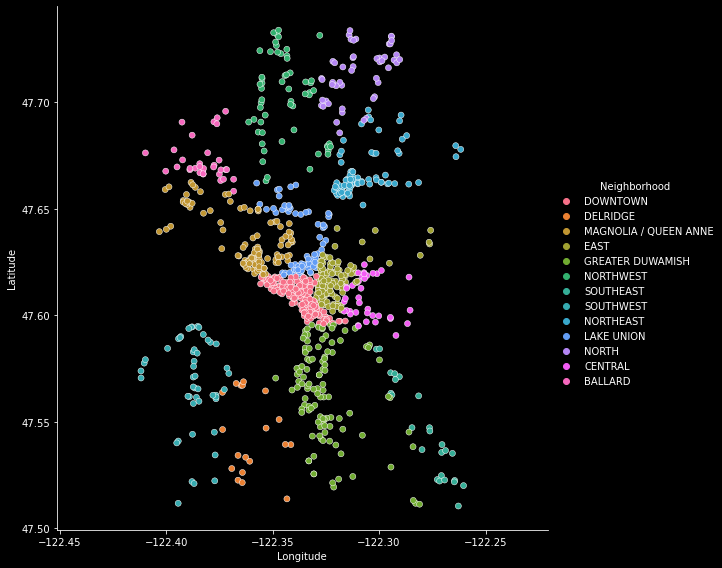


Predicted


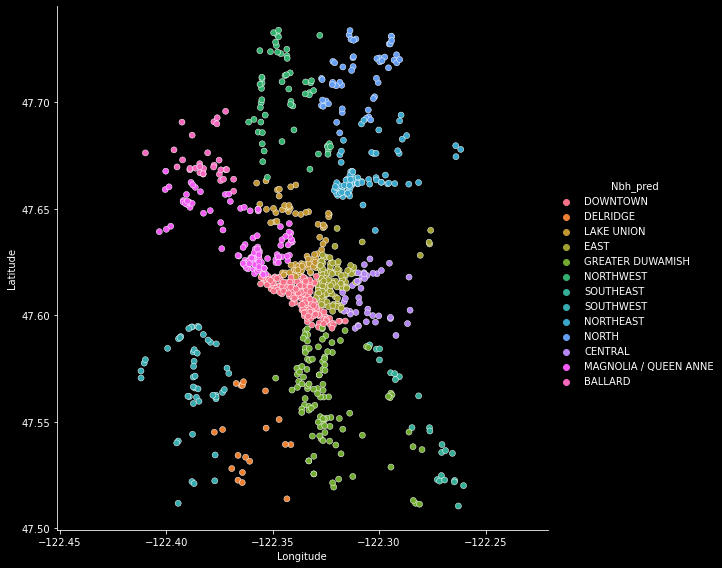

In [74]:
import seaborn as sns
print_subtitle('Real')
sns.relplot(x='Longitude', y='Latitude', hue='Neighborhood', data=loc_pred, height=8)
plt.axis('equal')
plt.show()

print_subtitle('Predicted')
sns.relplot(x='Longitude', y='Latitude', hue='Nbh_pred', data=loc_pred, height=8)
plt.axis('equal')
plt.show()

In [75]:
# TODO : petite fonction, avec graphique (optionnel) et retour du diff systématique
def compare_real_pred(y_pred, y_test):
    compare = pd.concat([pd.Series(y_test, name='y_test'), pd.Series(y_pred, name='y_pred')], axis=1)
    compare['err'] = y_pred - y_test
    compare['% err'] = compare.err / y_test
    #display(compare)
    return compare

def print_accuracy(y_pred, y_test):
    compare = compare_real_pred(y_pred, y_test)
    nb_ok = compare[compare.err == 0].err.count()
    nb_ko = compare[compare.err != 0].err.count()
    #display(compare.err.value_counts())
    print('nb ok :', nb_ok)
    print('nb ko :', nb_ko)
    print('perf :', round(100 * nb_ok / (nb_ok + nb_ko), 2), '%')



## District

On vérifie que tout fonctionne et que les fonctions permettent une bonne densité du code.

* <mark>TODO</mark> : ajouter DecisionBoundaryDisplay, ça pête pour une présentation
* <mark>TODO</mark> : essayer le radius pour voir si on peut faire encore mieux

### Collecte et préparation des données

In [76]:
from sklearn import model_selection, preprocessing
loc = _data[['Latitude', 'Longitude', 'CouncilDistrictCode']]
X = loc[loc.columns[:2]].values
y = loc.CouncilDistrictCode
X_train, X_test, y_train, y_test, id_train, id_test = model_selection.train_test_split(X, y, id, test_size=.3)
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

### Prédicteur et ajustement

In [77]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

### Prédiction

In [78]:
y_pred = clf.predict(X_test_std)
#neighbor_pred = decode_cat(y_pred, id_test, y_cat_map, 'Neighborhood')
#display(neighbor_pred)

loc_pred = _data.loc[id_test, ['Latitude', 'Longitude', 'CouncilDistrictCode']]
loc_pred['District_pred'] = y_pred
display(loc_pred)

,Latitude,Longitude,CouncilDistrictCode,District_pred
id,,,,
19906,47.61723,-122.35248,7,7
23010,47.71025,-122.32020,5,5
20372,47.61345,-122.34068,7,7
22238,47.66839,-122.37155,6,6
446,47.54868,-122.32550,2,2
...,...,...,...,...
345,47.60505,-122.33427,7,7
49705,47.68212,-122.26330,4,4
26146,47.63439,-122.34078,7,7


### Performance

In [79]:
print_accuracy(y_pred, y_test)

nb ok : 948
nb ko : 16
perf : 98.34 %


### Visualisation


Real


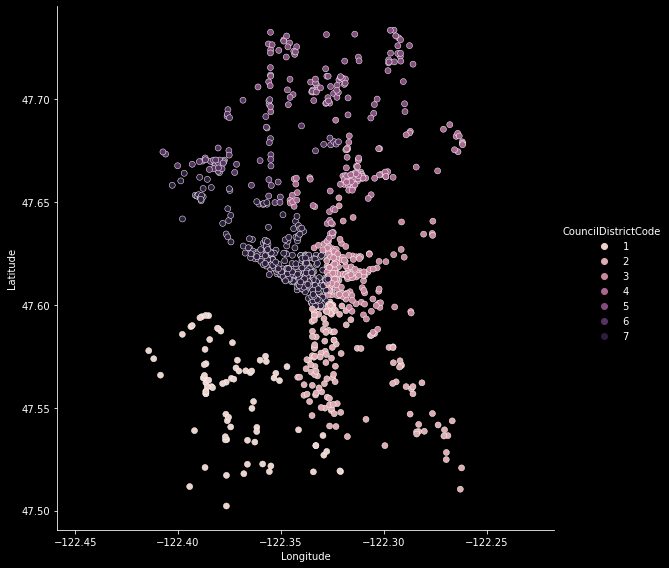


Predicted


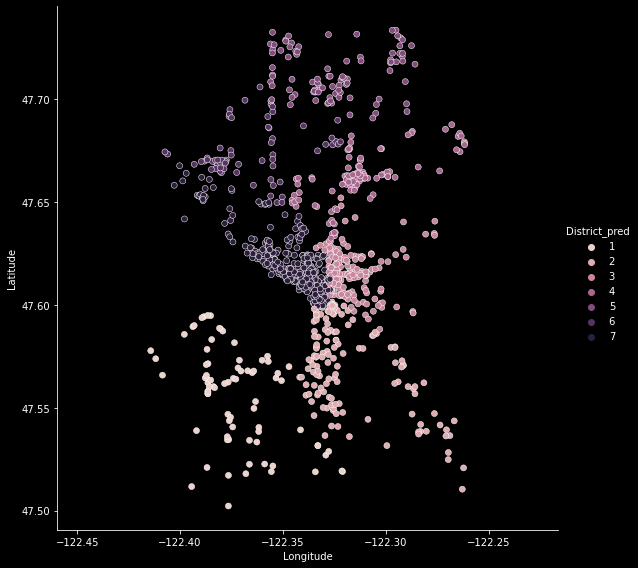

In [80]:
import seaborn as sns
print_subtitle('Real')
sns.relplot(x='Longitude', y='Latitude', hue='CouncilDistrictCode', data=loc_pred, height=8)
plt.axis('equal')
plt.show()

print_subtitle('Predicted')
sns.relplot(x='Longitude', y='Latitude', hue='District_pred', data=loc_pred, height=8)
plt.axis('equal')
plt.show()

# 26/09 focus régression linéaire

* conso d’énergie en fonction des surfaces par usage
* Matrice de confusion
* Site vs. Source, avec comparaison avec ma dummy intelligente
* Tester la régression linéaire ordinaire et d’arête.


Rappel :
* Surfaces
    - $s$ ⚪ `'s'` ⚪ `'PropertyGFATotal'` ⚪ $s=s_e+s_i$
    - $s_e$ ⚪`'s_e'` ⚪ `'PropertyGFAParking'`
    - $s_i$ ⚪ `'s_i'` ⚪ `'PropertyGFABuilding(s)'`
    - $s_u$ ⚪ `'s_u'` ⚪ $\sum_{u_k \in U}{s_{u_k}}$
    - $U=\{u_k, k=0, ...\}$ ⚪ `'u_0', ...` ⚪ Ensemble des labels d'usages, ordonnés par surface totale décroissante.
    - $u_{\text{1st}}, u_{\text{2nd}}, u_{\text{3rd}}$ ⚪ `'u_1st', u_2nd, u_3rd` ⚪ `'LargestPropertyUseType'`, etc
    - $s_{\text{1st}}, s_{\text{2nd}}, s_{\text{3rd}}$ ⚪ `'s_1st', s_2nd, s_3rd` ⚪ `'LargestPropertyUseTypeGFA'`, etc~
* Energies
    - $e$ ⚪ `'e'` ⚪ `'SiteEnergyUse(kBtu)'` ⚪ $e=e_e+e_s+e_g$
    - $e_e$ ⚪ `'e_e'` ⚪ `'Electricity(kBtu)'`
    - $e_s$ ⚪ `'e_s'` ⚪ `'SteamUse(kBtu)'`
    - $e_g$ ⚪ `'e_g'` ⚪ `'NaturalGas(kBtu)'`
    - $es$ ⚪ `'es'` ⚪ $s \times ies$
    - $ies$ ⚪ `'ies'` ⚪ `'SourceEUI(kBtu/sf)'`

On cherche d'abord à prédire les targets $e_e$, $e_s$, $e_g$ en fonction de $s_k, k \in \left[1, \cdots, 67\right]$

## $e_e = f(s_k, k \in \left[1, \cdots, 67\right])$

### Régression liénaire ordinaire

R2 = -2,38 : pas valable : d'une exécution à l'autre, j'obtiens des résultats très différents !

In [81]:
# transférée dans pepper_skl_commons -> from pepper_skl_commons import print_perf_measures
from sklearn import metrics
def print_perf_measures(y_real, y_pred):
    measures = {
        'RMSE': metrics.mean_squared_error(y_real, y_pred),
        'R2': metrics.r2_score(y_real, y_pred)
    }
    print(bold('performances'), ':')
    for k, m in measures.items():
        print(f'\t{k} :', round(m, 2))

In [82]:
# 1. récupérer la matrice des surfaces (en valeur absolue)
from use_types_analysis import use_table_2
use_table = use_table_2(_data, only_table=True)
#display(use_table)

# .. et e_e en tant que target
e_e = _data['Electricity(kBtu)']

# 2. identifier et nettoyer les NA : aucun - faire un truc générique réutilisable par copier coller
feat_has_na = use_table.isna().any(axis=1)
tgt_has_na = e_e.isna()
no_na = ~(feat_has_na | tgt_has_na)
#display(use_table[feat_has_na])
#display(e_e[tgt_has_na])
#na_index = list(set(use_table[feat_has_na].index) | set(e_e[tgt_has_na].index))
# display(use_table[no_na])
X = use_table[no_na].values
y = e_e[no_na].values
id = use_table[no_na].index

# display(X)
# display(y)

# 3. séparation, normalisation
from sklearn import model_selection
X_train, X_test, y_train, y_test, id_train, id_test = model_selection.train_test_split(X, y, id, test_size=.3)

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# 4. grid search (la spécialisée, il me semble pour le ridge)
# user guide : https://scikit-learn.org/stable/modules/grid_search.html#alternatives-to-brute-force-parameter-search
# linear_model.RidgeCV et linear_model.RidgeClassifierCV, idem pour Lasso etc

# on commence avec la régression linéaire ordinaire, et on testera toutes les autres
# nb : pour l'ordinaire, pas d'hyperparamètre
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X_train_std, y_train)
print(bold('score'), ':', reg.score(X_train_std, y_train))
#print(bold('coefs'), ':', reg.coef_)
print(bold('intercept'), ':', reg.intercept_)

y_pred = reg.predict(X_test_std)

# 5. performance et visualisation des résultats
#print_accuracy(y_pred, y_test) # ici, sur de la régression, c'est débile : faire une fonction cf. cours.
print_perf_measures(y_test, y_pred)

# x 6 intégration de la matrice de confusion (ben non, ce n'est pas adapté : c'est pour la classif.)

score : 0.9555230181654027
intercept : 4002337.1522884644
performances :
	RMSE : 9.546609445659288e+44
	R2 : -7.321273270297103e+30


### Régression Ridge (réduction de Tikhonov)

## $e_e/s = f(s_k/s, k \in \left[1, \cdots, 67\right])$


### Régression liénaire ordinaire

R2 = -1,1 : idem, pas valable, ça change significativement à chaque exécution.

Mais pourquoi ça change tant ? Il faut pouvoir visualiser, c'est l'enseignement d'Ascombe.

In [83]:
# 0 le normalisateur de base, la surface totale du bien
s = _data.PropertyGFATotal

# 1. récupérer la matrice des surfaces (en valeur absolue)
from use_types_analysis import use_table_2
use_table = use_table_2(_data, only_table=True)
iuse_table = use_table.div(s, axis=0)
#display(use_table)

# .. et e_e en tant que target
ie_e = _data['Electricity(kBtu)'] / s

# 2. identifier et nettoyer les NA : aucun - faire un truc générique réutilisable par copier coller
feat_has_na = iuse_table.isna().any(axis=1)
tgt_has_na = ie_e.isna()
no_na = ~(feat_has_na | tgt_has_na)
#display(use_table[feat_has_na])
#display(e_e[tgt_has_na])
#na_index = list(set(use_table[feat_has_na].index) | set(e_e[tgt_has_na].index))
# display(use_table[no_na])
X = iuse_table[no_na].values
y = ie_e[no_na].values
id = iuse_table[no_na].index

# display(X)
# display(y)

# 3. séparation, normalisation
from sklearn import model_selection
X_train, X_test, y_train, y_test, id_train, id_test = model_selection.train_test_split(X, y, id, test_size=.3)

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# 4. grid search (la spécialisée, il me semble pour le ridge)
# user guide : https://scikit-learn.org/stable/modules/grid_search.html#alternatives-to-brute-force-parameter-search
# linear_model.RidgeCV et linear_model.RidgeClassifierCV, idem pour Lasso etc

# on commence avec la régression linéaire ordinaire, et on testera toutes les autres
# nb : pour l'ordinaire, pas d'hyperparamètre
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X_train_std, y_train)
print(bold('score'), ':', reg.score(X_train_std, y_train))
#print(bold('coefs'), ':', reg.coef_)
print(bold('intercept'), ':', reg.intercept_)

y_pred = reg.predict(X_test_std)

# 5. performance et visualisation des résultats
#print_accuracy(y_pred, y_test) # ici, sur de la régression, c'est débile : faire une fonction cf. cours.
print_perf_measures(y_test, y_pred)

# x 6 intégration de la matrice de confusion (ben non, ce n'est pas adapté : c'est pour la classif.)

score : 0.5755215835951408
intercept : 34.09012722864188
performances :
	RMSE : 835.6
	R2 : 0.56


# Pb de stratification ?

1. Revenir sur la partie de User-guide concernée, la compléter si nécessaire.
2. Prévoir un plan de test cf. predict, qui fait varier le random state
3. Appliquer chacune des techniques de stratification cf. user guide et comparer les résultats

Evidemment, suivant ma norme pratique de fait, section complètement standalone.

ENSUITE, RETOUR SUR LASSO ET ELASTICNET avec récupération de l'intégralité des cv_results

Améliorations :
* Sauvegarde des détails de scores
* ✔ Scores externes cross_val..
* Diagramme de performances de prédiction
* Fermer des onglets SKL
* Baseline err : simplement les scores des principales dummies + la mienne (equiv au processus gaussien)
* Itérer sur cours : start le cours suivant (reste le TP + QZ sur le courant)

## Fonctions

In [45]:
# Reprduire sans que ce soit trop long, le résultat de la régression linéaire, une seule target, ie
# puis changer de stratégie de plis et comparer
import time
import numpy as np
import pandas as pd
from sklearn import linear_model
from pepper_commons import print_title, print_subtitle, bold
from pepper_skl_commons import Dataset, search_best_params
from seattle_commons import get_clean_ml_data

def best_ols_reg_search(ml_data, target, cv=10, n_seeds=42, test_size=.25, scale=True, verbose=False):

    model = linear_model.LinearRegression
    param_grid = {}

    random_states = np.arange(n_seeds)

    all_scores = []
    all_best_params = []
    all_best_score = []
    all_nested_score = []
    all_cv_results = []
    total_time = 0

    for random_state in random_states:
        if verbose:
            print_subtitle(f'random_state {random_state}, test_size {round(100 * test_size)} %')
        dataset = Dataset(ml_data, 'all', random_state, test_size)
        if verbose:
            print(f'dataset {dataset.name}, size {dataset.data.shape[0]}, '
                f'random_state {random_state}, test_size {round(100 * test_size)} % ⇒ ', end='')
        t = time.time()
        #scores = ml_main_6_scored(dataset, model, param_grid, cv=5, verbose=True)
        #scores = ml_main_6_scored_one_target(dataset, target, model, param_grid, cv=10, verbose=verbose)
        scores, best_params, best_score, nested_score, cv_results = \
            search_best_params(dataset, target, model, param_grid, cv=cv, verbose=verbose, scale=scale)
        t = time.time() - t
        if verbose:
            print(bold('time'), ':', round(t, 2), 's')
        else:
            print('.', end='')
        total_time += t
        all_scores += [scores]
        all_best_params += [best_params]
        all_best_score += [best_score]
        all_nested_score += [nested_score]
        all_cv_results += [cv_results]

    print(bold('TOTAL TIME'), ':', round(total_time, 2), 's')
    all_scores = pd.concat(all_scores, axis=0, ignore_index=True)
    all_scores = all_scores.sort_values(by=['target', 'test_score'], ascending=[True, False])
    all_best_score = pd.Series(all_best_score)
    all_nested_score = pd.Series(all_nested_score)
    all_cv_results = pd.concat(all_cv_results, axis=0, ignore_index=True)

    return all_scores, all_best_score, all_nested_score, all_cv_results

In [46]:
def show_search_results(all_scores, all_best_score, all_nested_score, all_cv_results):
    
    print_subtitle('All scores (ma version)')
    display(all_scores)
    
    # print_subtitle('All best params')
    # display(all_best_params) -> {} partout
    
    print_subtitle('All best scores')
    print(bold('mean'), ':', all_best_score.mean())
    print(bold('std'), ':', all_best_score.std())
    display(all_best_score)
    
    print_subtitle('All nested scores')
    print(bold('mean'), ':', all_nested_score.mean())
    print(bold('std'), ':', all_nested_score.std())
    display(all_nested_score)

    print_subtitle('All cv results')
    display(all_cv_results.head(50))

In [47]:
from pepper_skl_commons import unpack_item

def show_seed_mapsto_score(all_scores, all_best_score):
    x = unpack_item(all_scores.params, 'split.random_state')
    y = all_best_score
    import matplotlib.pyplot as plt
    plt.scatter(x=x, y=y, s=5)
    plt.xlabel('seed')
    plt.ylabel('best score')
    plt.show()

## Sans normalisation des données ($R^2 = -0,5$)

In [48]:
from seattle_commons import get_clean_ml_data

ml_data = get_clean_ml_data()
all_scores, all_best_score, all_nested_score, all_cv_results = \
    best_ols_reg_search(ml_data, target='ie', cv=10, n_seeds=100, test_size=.3, scale=False, verbose=False)
show_search_results(all_scores, all_best_score, all_nested_score, all_cv_results)

....................................................................................................TOTAL TIME : 34.52 s

All scores (ma version)


,date,dataset,target,method,params,dummy,train_eval_time,train_score,test_score,dummy_r2
14,2022-10-28 10:54:23.408638,all,ie,LinearRegression,"{'split.random_state': 14, 'split.test_size': ...",dummy,0.335,-10324.074,-2.791050e+03,_dummy_score
57,2022-10-28 10:54:39.154640,all,ie,LinearRegression,"{'split.random_state': 57, 'split.test_size': ...",dummy,0.345,-10804.158,-3.695433e+03,_dummy_score
0,2022-10-28 10:54:18.157638,all,ie,LinearRegression,"{'split.random_state': 0, 'split.test_size': 0.3}",dummy,0.403,-8313.573,-4.200196e+03,_dummy_score
74,2022-10-28 10:54:45.331636,all,ie,LinearRegression,"{'split.random_state': 74, 'split.test_size': ...",dummy,0.340,-9623.083,-5.511495e+03,_dummy_score
6,2022-10-28 10:54:20.394638,all,ie,LinearRegression,"{'split.random_state': 6, 'split.test_size': 0.3}",dummy,0.344,-7785.460,-6.217870e+03,_dummy_score
...,...,...,...,...,...,...,...,...,...,...
60,2022-10-28 10:54:40.239640,all,ie,LinearRegression,"{'split.random_state': 60, 'split.test_size': ...",dummy,0.339,-1092604.146,-1.283566e+09,_dummy_score
15,2022-10-28 10:54:23.767647,all,ie,LinearRegression,"{'split.random_state': 15, 'split.test_size': ...",dummy,0.332,-19417.954,-1.462208e+09,_dummy_score
23,2022-10-28 10:54:26.807635,all,ie,LinearRegression,"{'split.random_state': 23, 'split.test_size': ...",dummy,0.322,-4379245.591,-1.562640e+09,_dummy_score
2,2022-10-28 10:54:18.945638,all,ie,LinearRegression,"{'split.random_state': 2, 'split.test_size': 0.3}",dummy,0.347,-961333.930,-1.863880e+09,_dummy_score



All best scores
mean : -0.49009598273199684
std : 6.1034026119192255


0     0.196118
1     0.324656
2    -0.054831
3     0.129982
4     0.082916
        ...   
95    0.354328
96    0.298016
97    0.384733
98    0.102211
99    0.345116
Length: 100, dtype: float64


All nested scores
mean : -0.49009598273199684
std : 6.1034026119192255


0     0.196118
1     0.324656
2    -0.054831
3     0.129982
4     0.082916
        ...   
95    0.354328
96    0.298016
97    0.384733
98    0.102211
99    0.345116
Length: 100, dtype: float64


All cv results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012799,0.001600,0.003103,0.000700,{},0.047299,0.489740,0.070621,0.426126,0.454910,0.242243,0.394802,0.411515,-0.781585,0.205504,0.196118,0.358884,1
1,0.011700,0.001486,0.002700,0.000901,{},0.366178,0.193228,0.327110,-0.069162,0.299485,0.296044,0.368553,0.602200,0.567358,0.295572,0.324656,0.177273,1
2,0.011301,0.001736,0.002199,0.000600,{},0.126882,0.445482,-0.361463,0.474636,0.137116,0.366870,0.383504,0.444838,0.489272,-3.055447,-0.054831,1.030239,1
3,0.011100,0.002023,0.002400,0.000490,{},0.411073,-2.536023,0.499025,0.505551,0.276240,0.297052,0.419579,0.275106,0.689051,0.463171,0.129982,0.896752,1
4,0.010503,0.001284,0.002497,0.000670,{},0.279803,-2.181449,0.170730,0.075452,0.480004,0.308943,0.635561,0.433286,0.701172,-0.074344,0.082916,0.788530,1
5,0.009701,0.000781,0.002699,0.000900,{},0.595439,-0.036390,0.445145,0.532391,0.243351,-0.501420,0.439641,0.345795,0.334452,0.207366,0.260577,0.306075,1
6,0.011801,0.001780,0.002300,0.000460,{},0.212028,0.328286,0.265579,0.374660,0.430393,0.312157,0.574362,0.264905,0.520709,0.636746,0.391982,0.136549,1
7,0.013100,0.001136,0.003100,0.000700,{},0.511145,0.220817,0.389141,0.478133,0.353627,-0.117329,0.510741,0.083650,0.205859,0.351560,0.298735,0.192430,1
8,0.013398,0.001281,0.003001,0.000633,{},0.524379,0.426143,0.453128,-0.190683,0.254742,0.430302,0.298351,0.350545,-25.742701,-17.173764,-4.036956,8.920846,1
9,0.010502,0.001359,0.002097,0.000539,{},0.499864,0.194237,0.077644,0.617867,0.626227,0.384662,0.431787,0.263331,-0.288477,0.562689,0.336983,0.271210,1


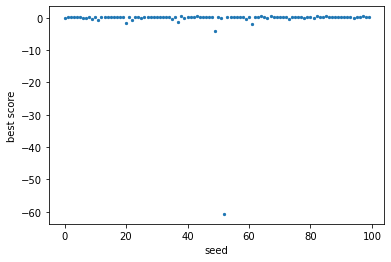

In [50]:
show_seed_mapsto_score(all_scores, all_best_score)

## Avec normalisation des données ($R^2 = -2.10^{26}$)

In [51]:
ml_data = get_clean_ml_data()
all_scores, all_best_score, all_nested_score, all_cv_results = \
    best_ols_reg_search(ml_data, target='ie', cv=10, n_seeds=100, test_size=.3, scale=True, verbose=False)
show_search_results(all_scores, all_best_score, all_nested_score, all_cv_results)

....................................................................................................TOTAL TIME : 32.95 s

All scores (ma version)


,date,dataset,target,method,params,dummy,train_eval_time,train_score,test_score,dummy_r2
83,2022-10-28 10:55:58.153834,all,ie,LinearRegression,"{'split.random_state': 83, 'split.test_size': ...",dummy,0.316,0.569,5.640000e-01,_dummy_score
16,2022-10-28 10:55:34.640831,all,ie,LinearRegression,"{'split.random_state': 16, 'split.test_size': ...",dummy,0.334,0.501,5.440000e-01,_dummy_score
90,2022-10-28 10:56:00.583833,all,ie,LinearRegression,"{'split.random_state': 90, 'split.test_size': ...",dummy,0.298,0.570,5.380000e-01,_dummy_score
73,2022-10-28 10:55:54.615835,all,ie,LinearRegression,"{'split.random_state': 73, 'split.test_size': ...",dummy,0.345,0.504,5.070000e-01,_dummy_score
14,2022-10-28 10:55:33.939830,all,ie,LinearRegression,"{'split.random_state': 14, 'split.test_size': ...",dummy,0.306,0.553,5.050000e-01,_dummy_score
...,...,...,...,...,...,...,...,...,...,...
84,2022-10-28 10:55:58.502831,all,ie,LinearRegression,"{'split.random_state': 84, 'split.test_size': ...",dummy,0.323,0.538,-2.713052e+26,_dummy_score
3,2022-10-28 10:55:30.004833,all,ie,LinearRegression,"{'split.random_state': 3, 'split.test_size': 0.3}",dummy,0.300,0.637,-5.918052e+26,_dummy_score
48,2022-10-28 10:55:45.662865,all,ie,LinearRegression,"{'split.random_state': 48, 'split.test_size': ...",dummy,0.308,0.598,-7.865514e+26,_dummy_score
31,2022-10-28 10:55:39.902833,all,ie,LinearRegression,"{'split.random_state': 31, 'split.test_size': ...",dummy,0.320,0.572,-9.262240e+26,_dummy_score



All best scores
mean : -2.1104910686557033e+26
std : 5.899560256417077e+26


0    -1.452548e+05
1    -2.741655e+26
2    -2.471640e+24
3     1.285390e-01
4    -5.081116e+26
          ...     
95   -1.337473e+27
96   -1.301601e+25
97   -4.409508e+23
98   -3.919068e+24
99   -3.359253e+25
Length: 100, dtype: float64


All nested scores
mean : -2.1104910686557033e+26
std : 5.899560256417077e+26


0    -1.452548e+05
1    -2.741655e+26
2    -2.471640e+24
3     1.285390e-01
4    -5.081116e+26
          ...     
95   -1.337473e+27
96   -1.301601e+25
97   -4.409508e+23
98   -3.919068e+24
99   -3.359253e+25
Length: 100, dtype: float64


All cv results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011399,0.001428,0.003104,0.000533,{},-1.452547e+06,4.898892e-01,7.194812e-02,-2.239583e+00,4.551995e-01,1.702971e-01,3.953678e-01,4.115522e-01,-8.437258e-01,2.196287e-01,-1.452548e+05,4.357641e+05,1
1,0.011092,0.001567,0.002603,0.000795,{},3.663161e-01,-5.272453e+18,3.269607e-01,-7.895574e-02,2.993775e-01,2.960450e-01,-1.507107e+24,6.023732e-01,5.673751e-01,-2.740148e+27,-2.741655e+26,8.219941e+26,1
2,0.009705,0.001486,0.002396,0.000667,{},-3.389063e+21,4.392680e-01,-3.606994e-01,-5.857343e+23,1.350959e-01,3.667755e-01,3.765705e-01,-1.561259e+08,-2.914922e+21,-2.412436e+25,-2.471640e+24,7.219681e+24,1
3,0.010402,0.001626,0.002698,0.000770,{},4.119993e-01,-2.553295e+00,4.987412e-01,5.059182e-01,2.798071e-01,2.969159e-01,4.197131e-01,2.735050e-01,6.888700e-01,4.632151e-01,1.285390e-01,9.019455e-01,1
4,0.009394,0.000909,0.002199,0.000594,{},2.845839e-01,-2.187025e+00,1.685231e-01,-1.270571e+25,4.800036e-01,-6.671985e+23,-6.476445e+24,4.311753e-01,7.011717e-01,-5.061266e+27,-5.081116e+26,1.517723e+27,1
5,0.011808,0.001167,0.003296,0.000641,{},5.954395e-01,-5.561334e+01,-1.530986e+24,5.259373e-01,2.431175e-01,-3.270350e+26,-4.003277e+24,3.457949e-01,3.342417e-01,1.948752e-01,-3.325693e+25,9.793366e+25,1
6,0.010908,0.001452,0.003104,0.000694,{},2.120943e-01,3.383175e-01,2.635258e-01,-2.301255e+23,4.303902e-01,3.120984e-01,5.441188e-01,2.663259e-01,5.207045e-01,-8.333767e+24,-8.563892e+23,2.493403e+24,1
7,0.010402,0.001020,0.002498,0.000670,{},5.114238e-01,2.202795e-01,3.894717e-01,-1.678490e+24,3.536272e-01,-1.210595e-01,-1.443546e+27,9.738743e-02,-7.649312e+26,3.482238e-01,-2.210156e+26,4.669550e+26,1
8,0.011389,0.001296,0.002906,0.000680,{},5.259034e-01,-2.077606e+22,4.526627e-01,-2.689084e+24,2.541303e-01,4.303016e-01,2.983513e-01,3.505454e-01,-2.571969e+01,-1.718419e+01,-2.709860e+23,8.060565e+23,1
9,0.010909,0.001388,0.002885,0.000707,{},4.448725e-01,1.941955e-01,7.981063e-02,-3.551963e+22,6.262274e-01,-2.866234e+25,-4.000171e+03,2.629849e-01,-2.889087e-01,5.639471e-01,-2.869786e+24,8.597524e+24,1


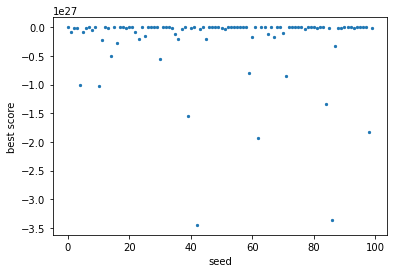

In [52]:
show_seed_mapsto_score(all_scores, all_best_score)

## Avec ShuffleSplit + sans normalisation des données ($R^2 = -1,5$ (nested score))

Je suis en échec complet, et je ne comprends pas mes résultats.

Les stratégies de split n'apportent rien de mieux que le KFold par défaut et dégradent même la performance.

Idem avec la normalisation, elle ne fait que dégrader la performance.

La conclusion (qui ne me semble pas vraissemblable), c'est que la régression linéaire sous-performe par rapport à une stratégie dummy constante.

Je laisse de côté pour le moment pour tenter de percer tous ces mystère bloquants accumulés par d'autres voies.

In [55]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(10)
ml_data = get_clean_ml_data()
all_scores, all_best_score, all_nested_score, all_cv_results = \
    best_ols_reg_search(ml_data, target='ie', cv=cv, n_seeds=100, test_size=.3, scale=False, verbose=False)
show_search_results(all_scores, all_best_score, all_nested_score, all_cv_results)

....................................................................................................TOTAL TIME : 35.6 s

All scores (ma version)


,date,dataset,target,method,params,dummy,train_eval_time,train_score,test_score,dummy_r2
14,2022-10-28 11:02:09.127231,all,ie,LinearRegression,"{'split.random_state': 14, 'split.test_size': ...",dummy,0.339,-10324.074,-2.791050e+03,_dummy_score
57,2022-10-28 11:02:25.471230,all,ie,LinearRegression,"{'split.random_state': 57, 'split.test_size': ...",dummy,0.377,-10804.158,-3.695433e+03,_dummy_score
0,2022-10-28 11:02:03.822575,all,ie,LinearRegression,"{'split.random_state': 0, 'split.test_size': 0.3}",dummy,0.331,-8313.573,-4.200196e+03,_dummy_score
74,2022-10-28 11:02:31.964231,all,ie,LinearRegression,"{'split.random_state': 74, 'split.test_size': ...",dummy,0.337,-9623.083,-5.511495e+03,_dummy_score
6,2022-10-28 11:02:06.105247,all,ie,LinearRegression,"{'split.random_state': 6, 'split.test_size': 0.3}",dummy,0.352,-7785.460,-6.217870e+03,_dummy_score
...,...,...,...,...,...,...,...,...,...,...
60,2022-10-28 11:02:26.630231,all,ie,LinearRegression,"{'split.random_state': 60, 'split.test_size': ...",dummy,0.379,-1092604.146,-1.283566e+09,_dummy_score
15,2022-10-28 11:02:09.554230,all,ie,LinearRegression,"{'split.random_state': 15, 'split.test_size': ...",dummy,0.398,-19417.954,-1.462208e+09,_dummy_score
23,2022-10-28 11:02:12.650229,all,ie,LinearRegression,"{'split.random_state': 23, 'split.test_size': ...",dummy,0.339,-4379245.591,-1.562640e+09,_dummy_score
2,2022-10-28 11:02:04.576574,all,ie,LinearRegression,"{'split.random_state': 2, 'split.test_size': 0.3}",dummy,0.321,-961333.930,-1.863880e+09,_dummy_score



All best scores
mean : -0.10484107032191253
std : 2.4739716943084593


0     0.079682
1     0.348759
2    -0.759100
3     0.180850
4     0.166235
        ...   
95    0.418053
96    0.329524
97    0.015606
98   -0.038163
99    0.409304
Length: 100, dtype: float64


All nested scores
mean : -1.4884113644813182
std : 15.78745263960789


0     0.262627
1     0.382949
2    -1.015462
3    -0.417577
4     0.153391
        ...   
95    0.324487
96    0.411159
97    0.401425
98    0.202775
99    0.362285
Length: 100, dtype: float64


All cv results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011394,0.001438,0.002605,0.000488,{},0.593761,0.415807,-0.643866,-1.080591,0.229752,0.450840,0.226104,0.248653,0.170931,0.185432,0.079682,0.497674,1
1,0.013800,0.002272,0.003099,0.000700,{},0.343731,0.358286,0.699603,0.734800,-0.799421,0.457164,0.617525,0.060639,0.385708,0.629554,0.348759,0.428692,1
2,0.011500,0.001433,0.002899,0.000830,{},0.598543,0.138003,0.129882,0.276616,-9.828988,0.077711,-0.088461,0.260613,0.363565,0.481515,-0.759100,3.029244,1
3,0.010602,0.000918,0.002197,0.000394,{},0.656370,0.494953,0.654530,0.191616,0.422063,0.358122,0.723465,0.586547,-2.625853,0.346691,0.180850,0.948841,1
4,0.011103,0.001372,0.002503,0.000670,{},0.454824,0.209510,0.314978,0.251018,0.113336,-0.380127,0.360180,-0.344571,0.167044,0.516156,0.166235,0.289268,1
5,0.012005,0.001726,0.002896,0.000694,{},0.261213,0.529667,0.338982,0.223413,0.333597,-0.082334,0.131461,0.162177,0.279633,-0.646014,0.153179,0.305964,1
6,0.011603,0.001620,0.002999,0.000778,{},0.201174,0.409497,0.449009,0.410482,0.416600,0.318264,-1.698900,0.476309,0.060758,0.241625,0.128482,0.621550,1
7,0.011401,0.001745,0.002498,0.000672,{},-0.197489,0.354303,0.554305,-0.531537,0.143123,0.348265,0.538428,0.439004,0.489344,-0.051679,0.208607,0.344337,1
8,0.011600,0.001560,0.002698,0.000783,{},0.361724,0.343375,-0.021094,0.449321,0.263470,0.340356,0.208851,0.537200,0.399888,0.266749,0.314984,0.144036,1
9,0.011700,0.001901,0.002300,0.000458,{},-0.372637,0.444429,0.454924,0.326597,0.418044,0.567528,0.586016,0.464897,0.769860,0.341281,0.400094,0.285446,1


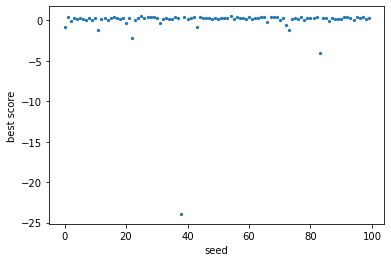

In [56]:
show_seed_mapsto_score(all_scores, all_best_score)

# Comparaison des stratégies CV

Voir [User guide | 3.1.2. Itérateurs de validation croisée](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)

Je ne m'explique pas les résultats obtenus, mais j'en conclus que j'ai intérêt à utiliser la stratégie `ShuffleSplit`.

In [12]:
import matplotlib.pyplot as plt
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=[f"Data\ngroup\n({groups.name})", f"Data\nclass\n({classes.name})"],
        xlabel="Sample index",
        title=f"{name} data distribution"
    )

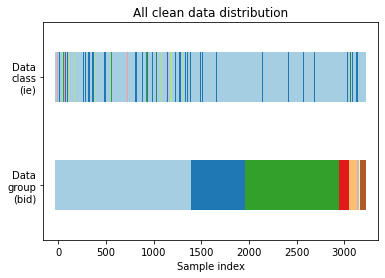

In [25]:
from seattle_commons import get_clean_ml_data
ml_data = get_clean_ml_data()
ml_data = ml_data.sort_values(by='bid')

from pepper_skl_commons import get_X_Y
X, Y = get_X_Y(ml_data)
y = classes = Y.ie
groups = X.bid

# visualisation des classes et groupes
visualize_groups(classes, groups, 'All clean')

In [37]:
import numpy as np
from matplotlib.patches import Patch
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    return ax

In [23]:
from sklearn.model_selection import (
    TimeSeriesSplit,
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit,
    StratifiedGroupKFold,
)

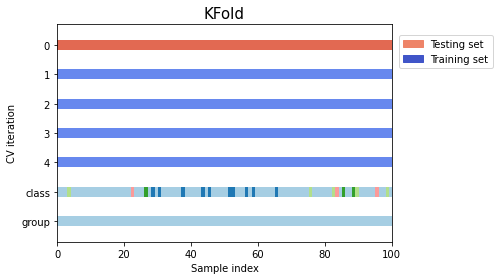

In [38]:
n_splits = 5
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)
plt.show()

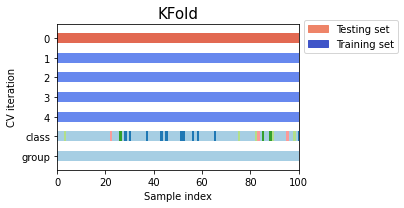

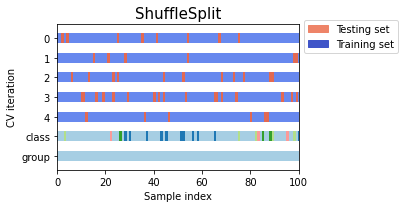

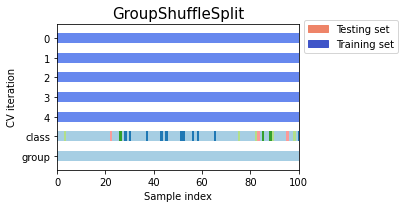

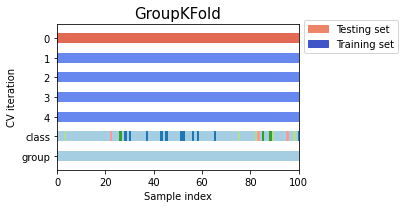

In [43]:
cvs = [KFold, ShuffleSplit, GroupShuffleSplit, GroupKFold]   # la cible est numérique ce qui exclut les stratégies stratifiées

for cv in cvs:
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(cv(n_splits), X, y, groups, ax, n_splits)
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)